Data background

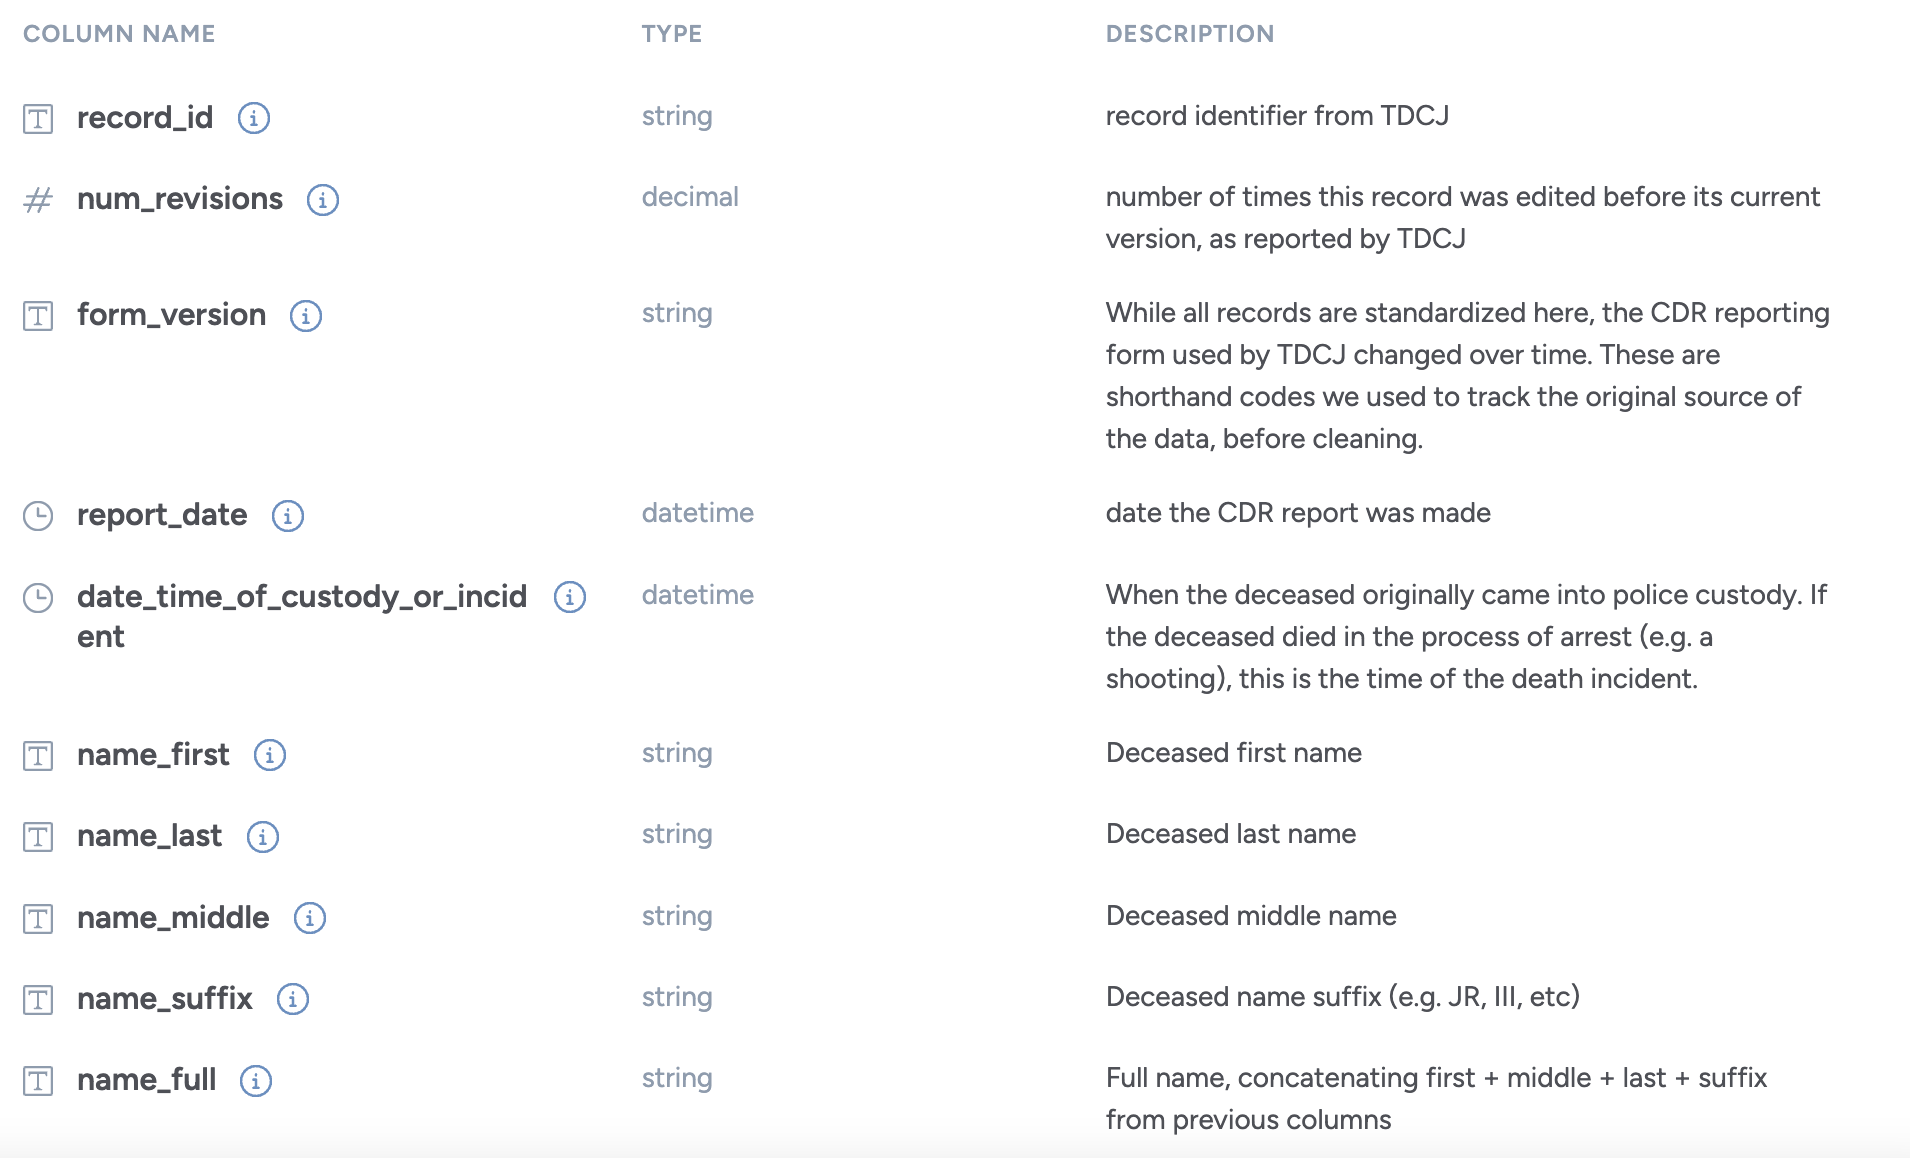

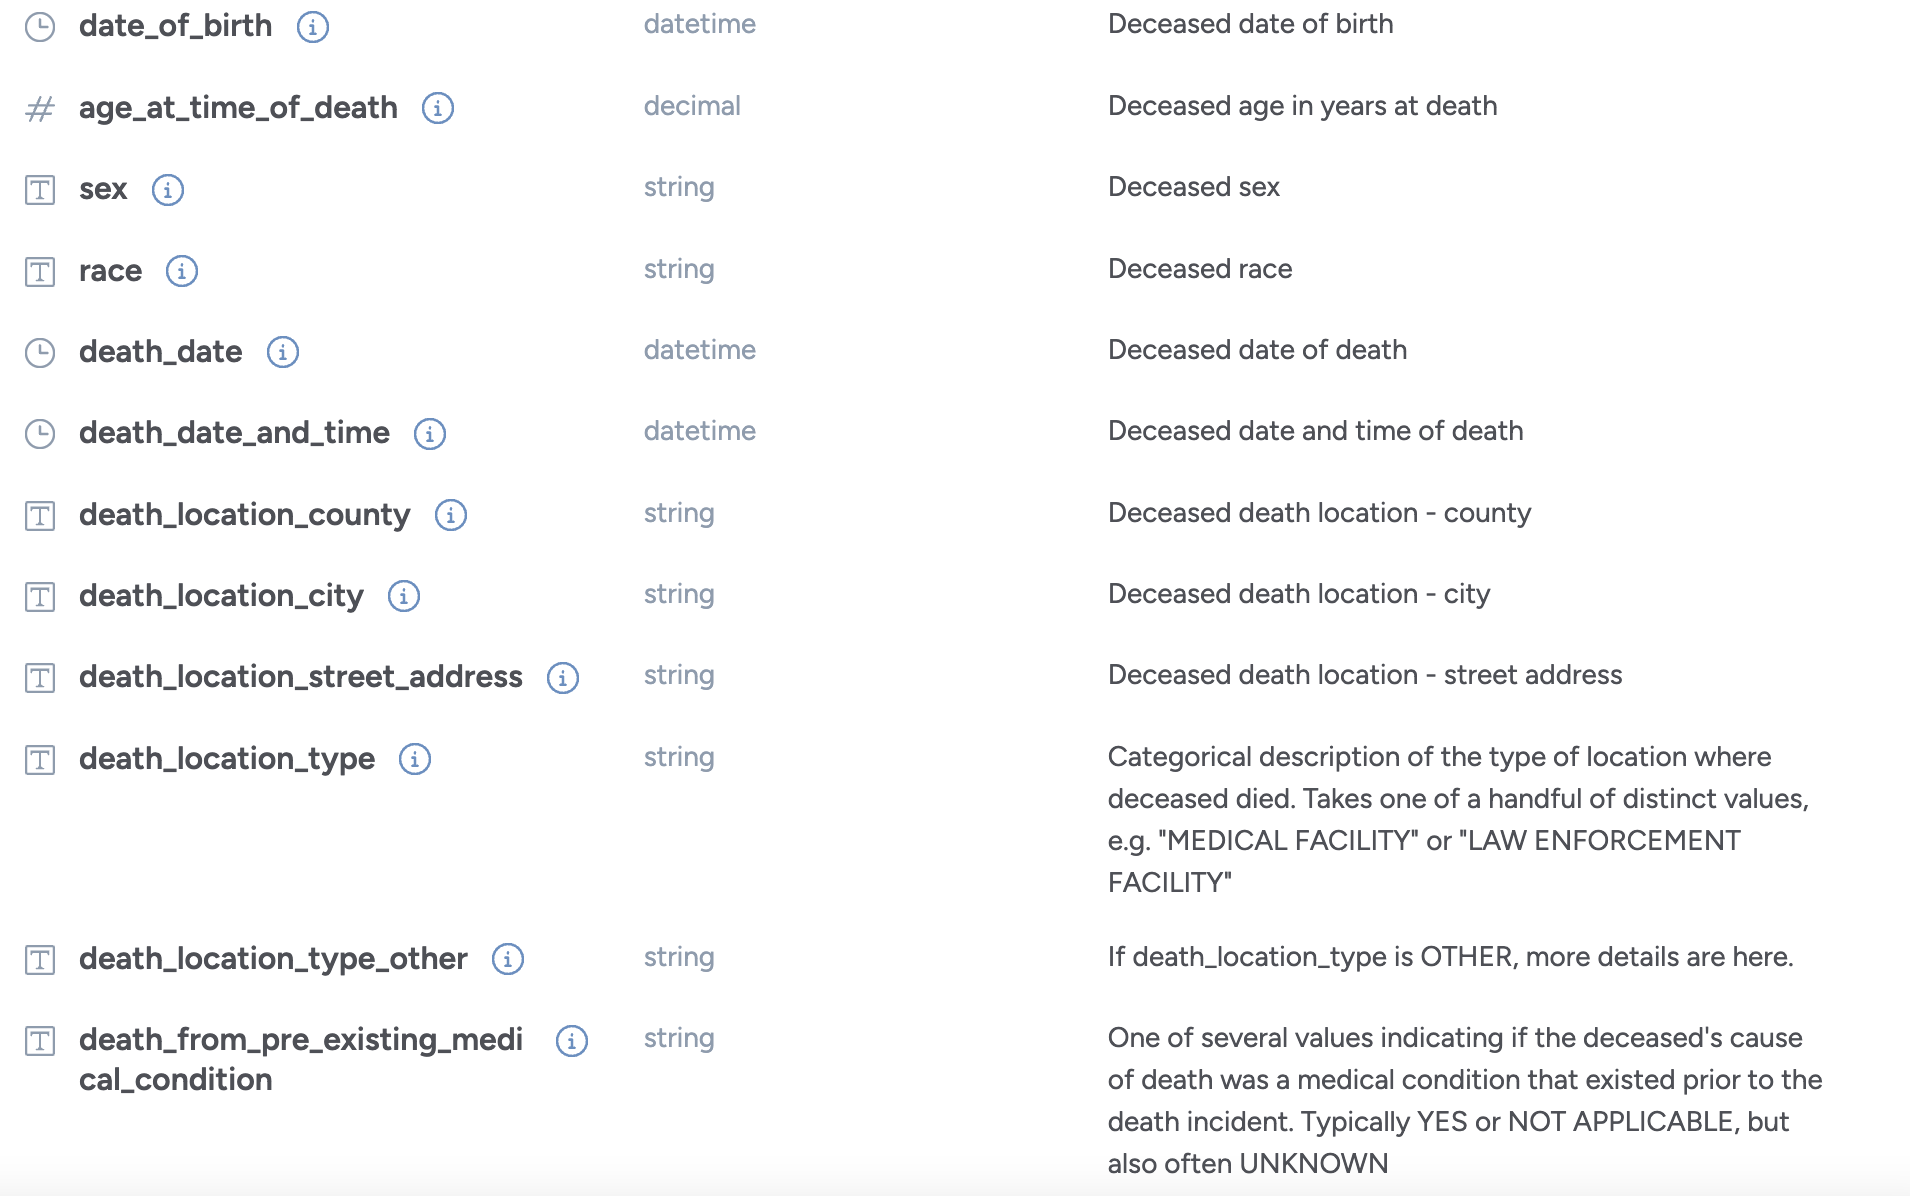

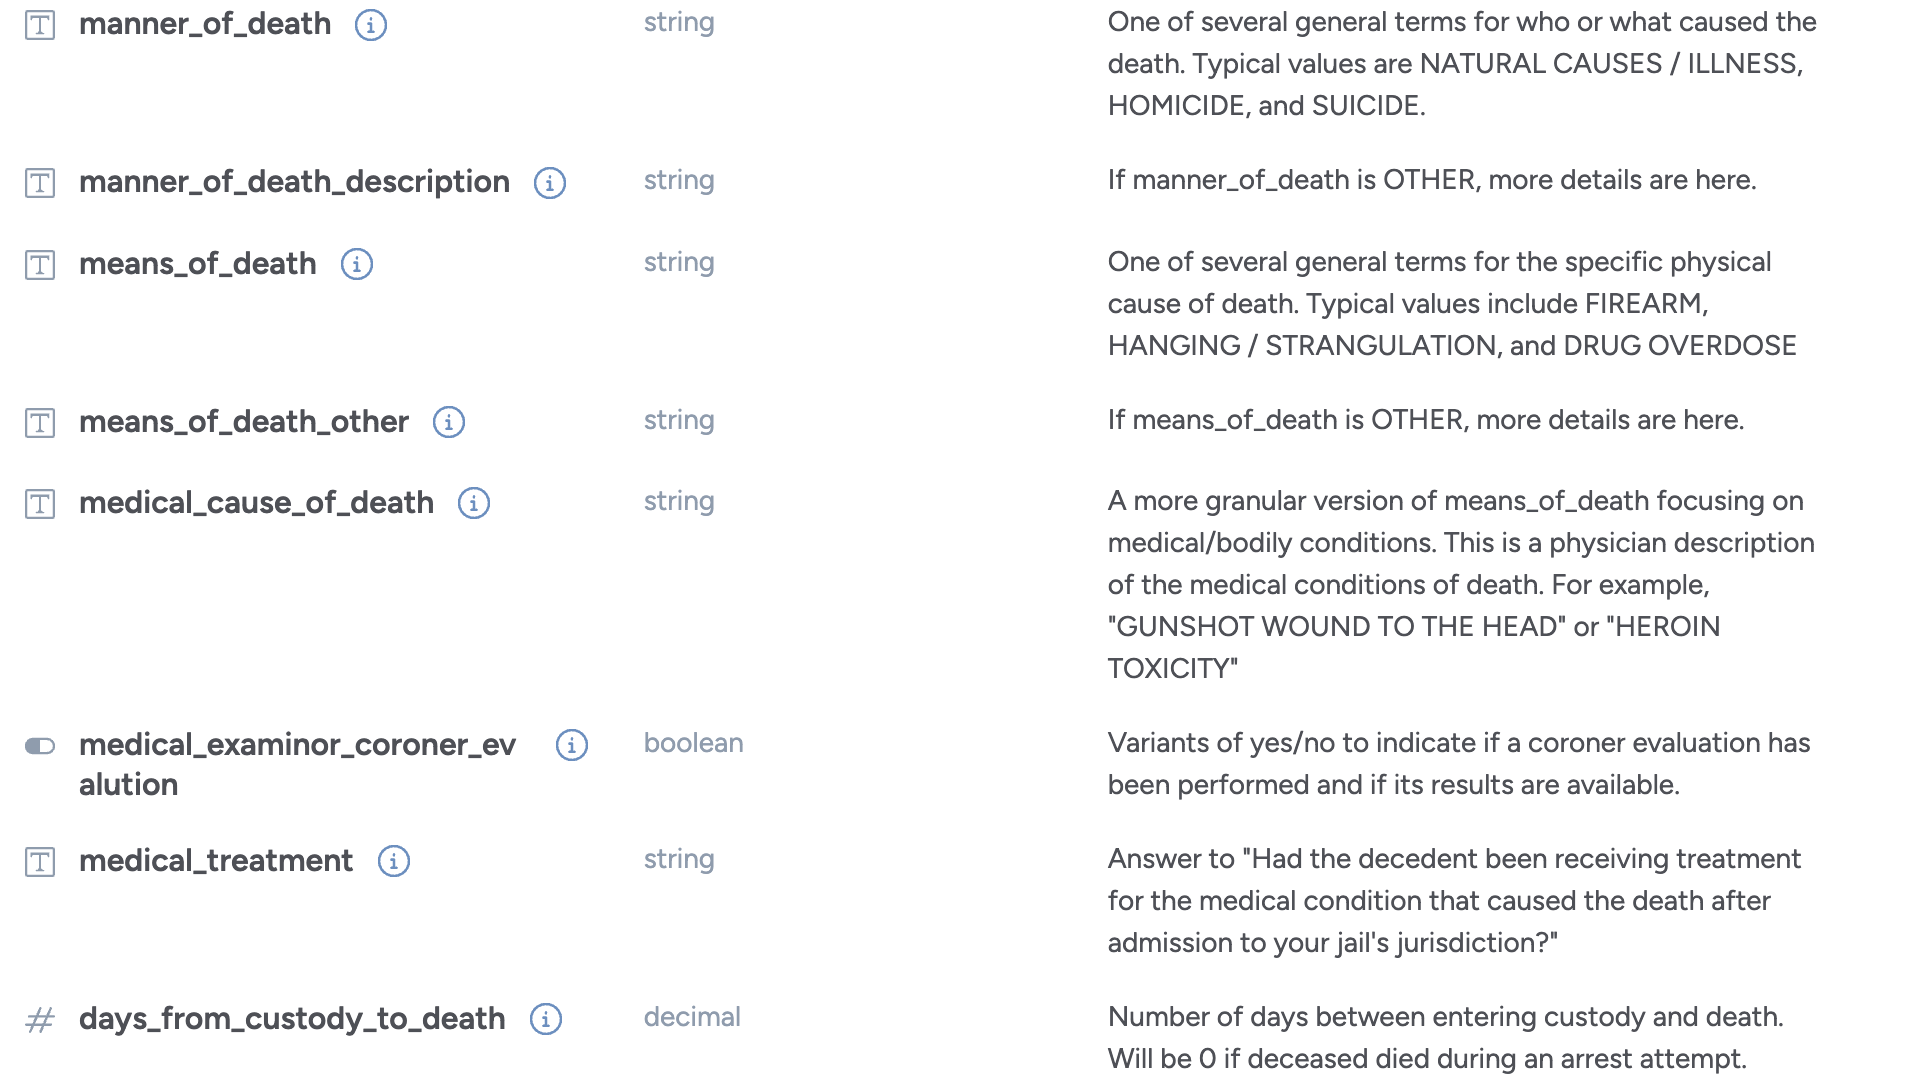

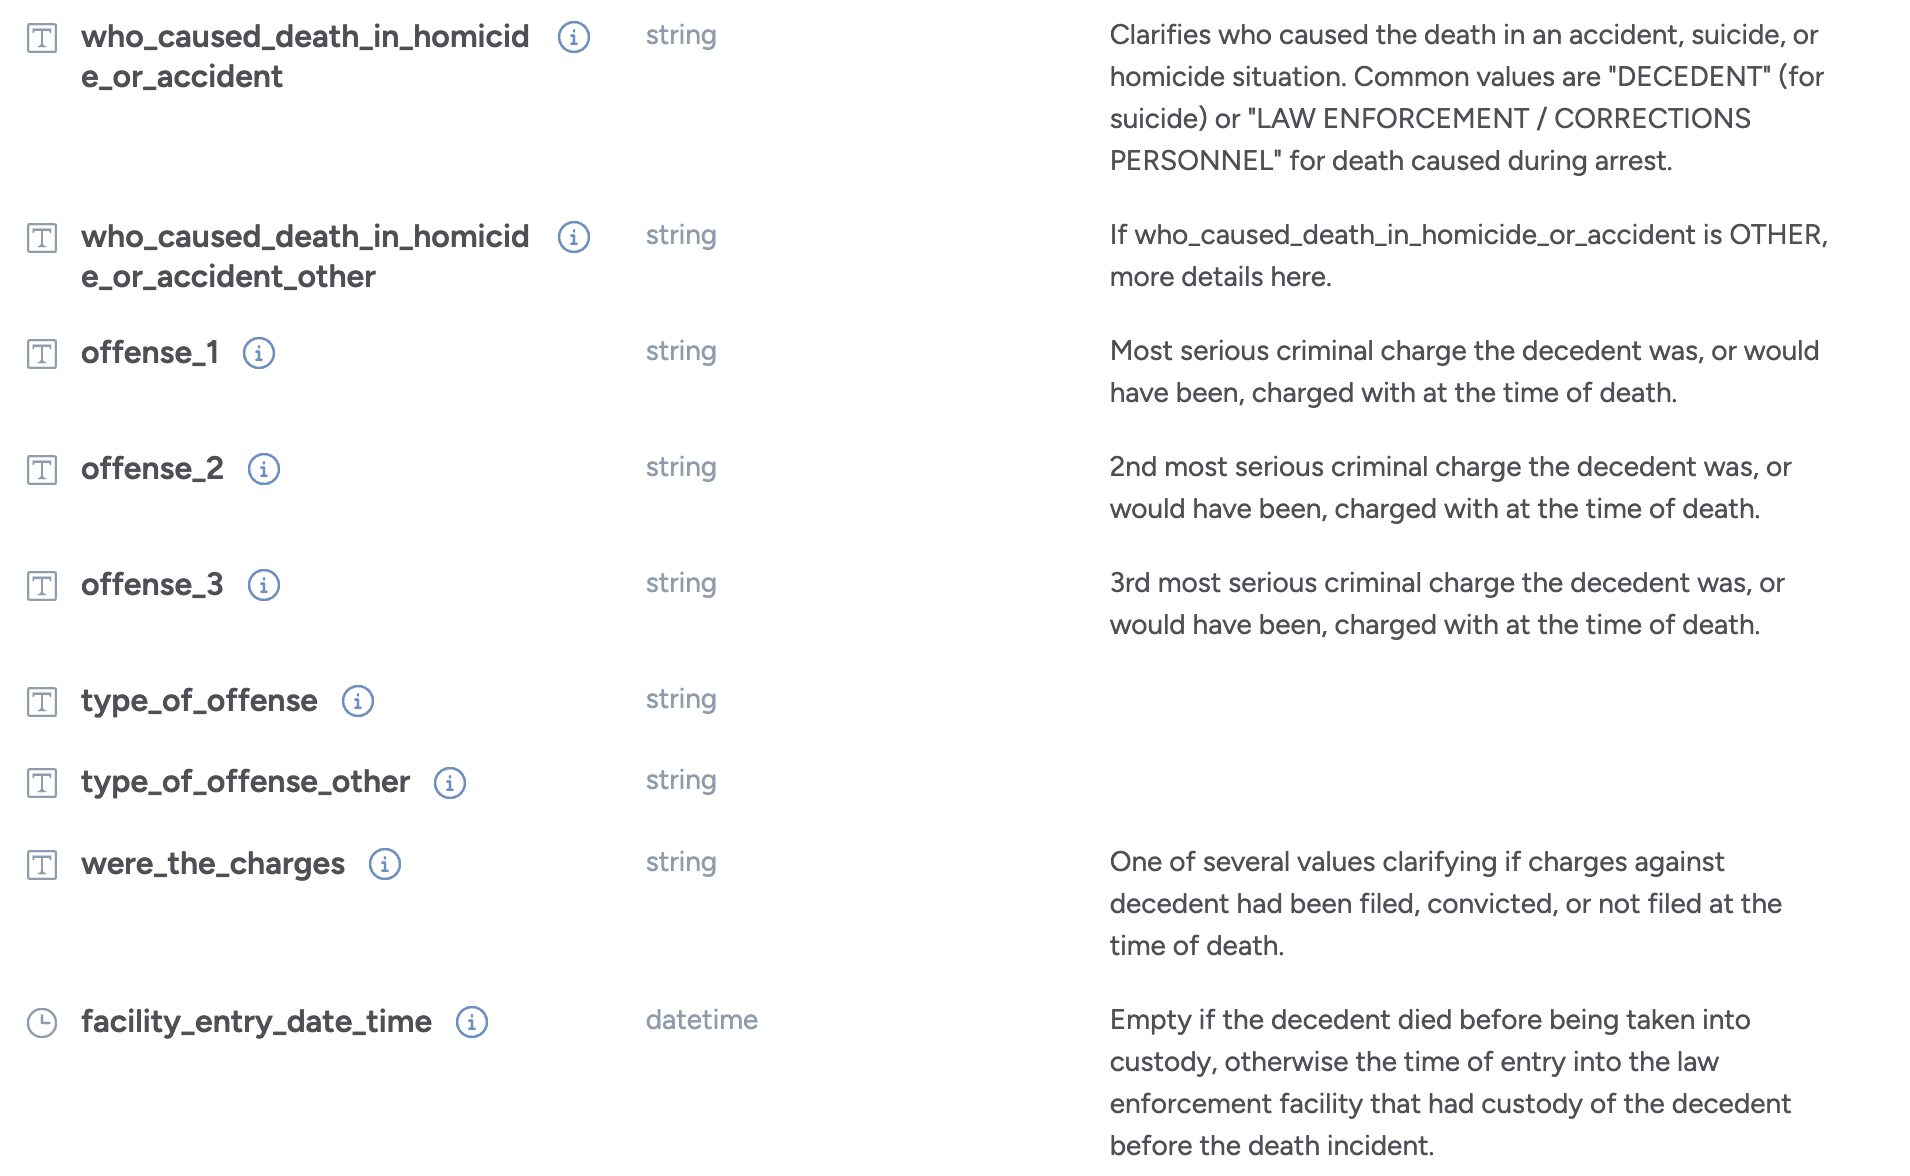

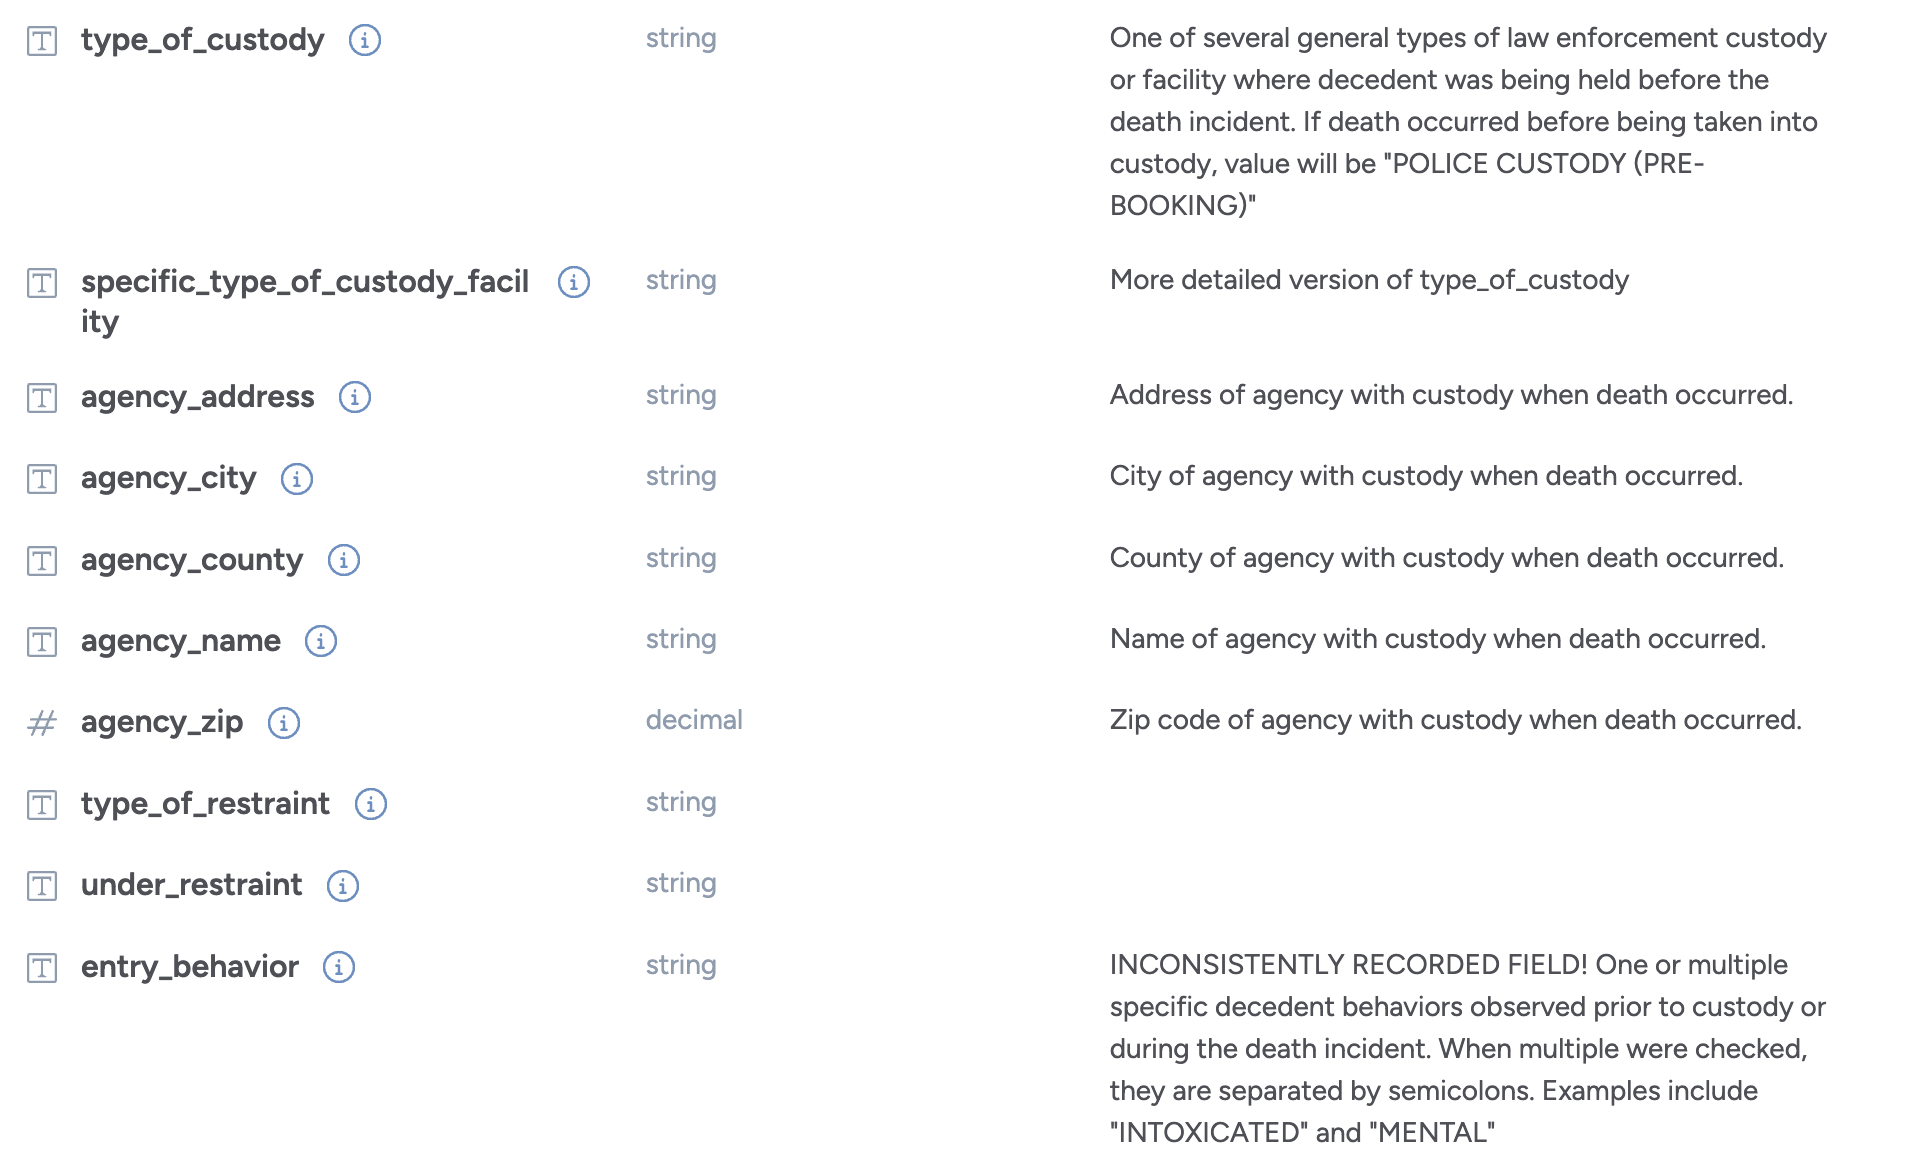

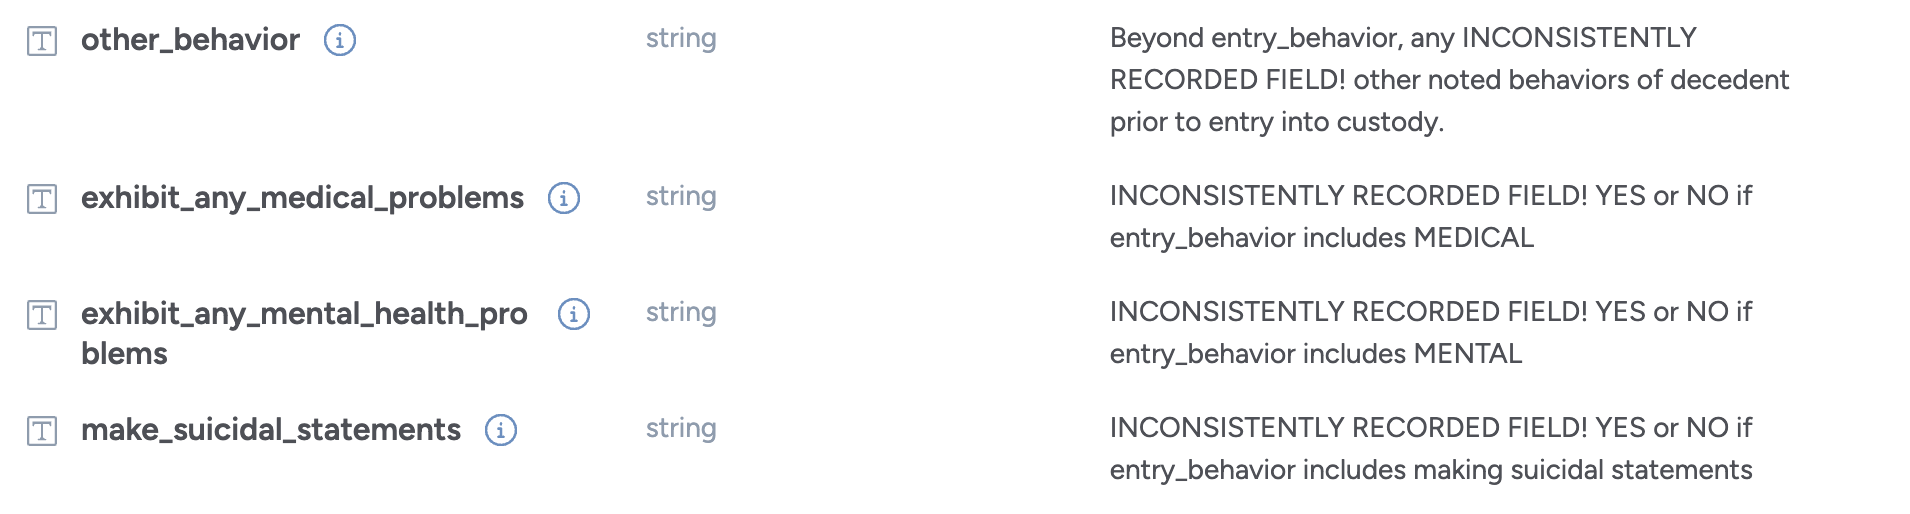

# Load the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
df = pd.read_csv('./cleaned_custodial_death_reports.csv')

In [4]:
print(df.columns)

Index(['record_id', 'num_revisions', 'form_version', 'report_date',
       'date_time_of_custody_or_incident', 'name_first', 'name_last',
       'name_middle', 'name_suffix', 'name_full', 'date_of_birth',
       'age_at_time_of_death', 'sex', 'race', 'death_date',
       'death_date_and_time', 'death_location_county', 'death_location_city',
       'death_location_street_address', 'death_location_type',
       'death_location_type_other',
       'death_from_pre_existing_medical_condition', 'manner_of_death',
       'manner_of_death_description', 'means_of_death', 'means_of_death_other',
       'medical_cause_of_death', 'medical_examinor_coroner_evalution',
       'medical_treatment', 'days_from_custody_to_death',
       'who_caused_death_in_homicide_or_accident',
       'who_caused_death_in_homicide_or_accident_other', 'offense_1',
       'offense_2', 'offense_3', 'type_of_offense', 'type_of_offense_other',
       'were_the_charges', 'facility_entry_date_time', 'type_of_custody',
      

At first glance, not meaningful features include:
- record_id: just an identifier
- num_revisions: clerical
- form_version: clerical
- report_date: clerical
- name_first: redundant
- name_last: redundant
- name_middle: redundant
- name_suffix: redundant
- death_location_street_address: not useful–more meaningful to look at county, city, etc.

In [5]:
df.drop(columns=['record_id',
                 'num_revisions',
                 'form_version',
                 'report_date',
                 'name_first',
                 'name_last',
                 'name_middle',
                 'name_suffix',
                 'death_location_street_address'], inplace=True)

Look at numeric values

In [6]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,age_at_time_of_death,days_from_custody_to_death,agency_zip
0,54.0,270.0,79521.0
1,35.0,1.0,76307.0
2,37.0,724.0,78118.0
3,67.0,12221.0,77320.0
4,85.0,9113.0,77320.0


Explore age at time of death

count    14279.000000
mean        50.231809
std         15.915809
min        -35.000000
25%         39.000000
50%         52.000000
75%         62.000000
max         93.000000
Name: age_at_time_of_death, dtype: float64


<Axes: xlabel='age_at_time_of_death', ylabel='Count'>

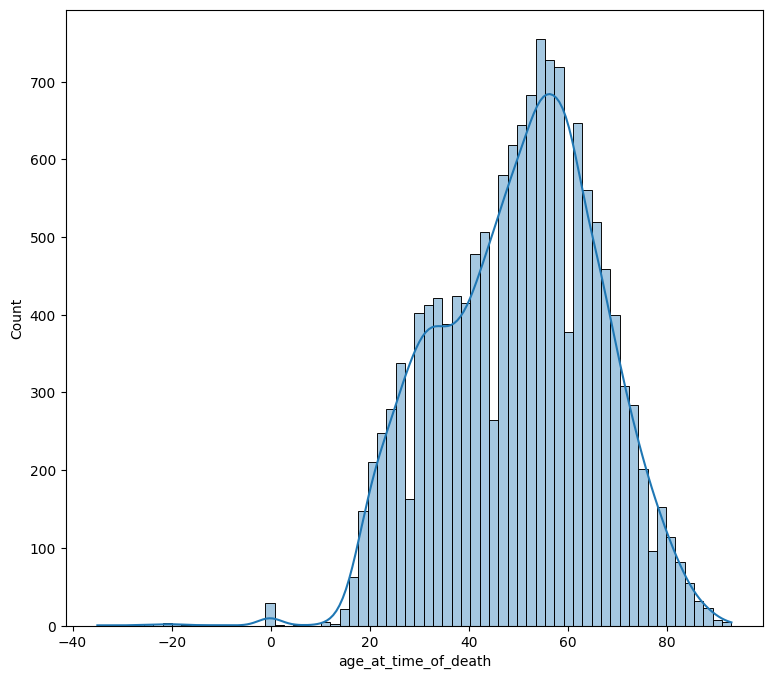

In [7]:
print(df['age_at_time_of_death'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['age_at_time_of_death'], kde=True, alpha = 0.4)

count    14125.000000
mean      2508.613097
std       3455.613252
min          0.000000
25%          7.000000
50%        772.000000
75%       4066.000000
max      22645.000000
Name: days_from_custody_to_death, dtype: float64


<Axes: xlabel='days_from_custody_to_death', ylabel='Count'>

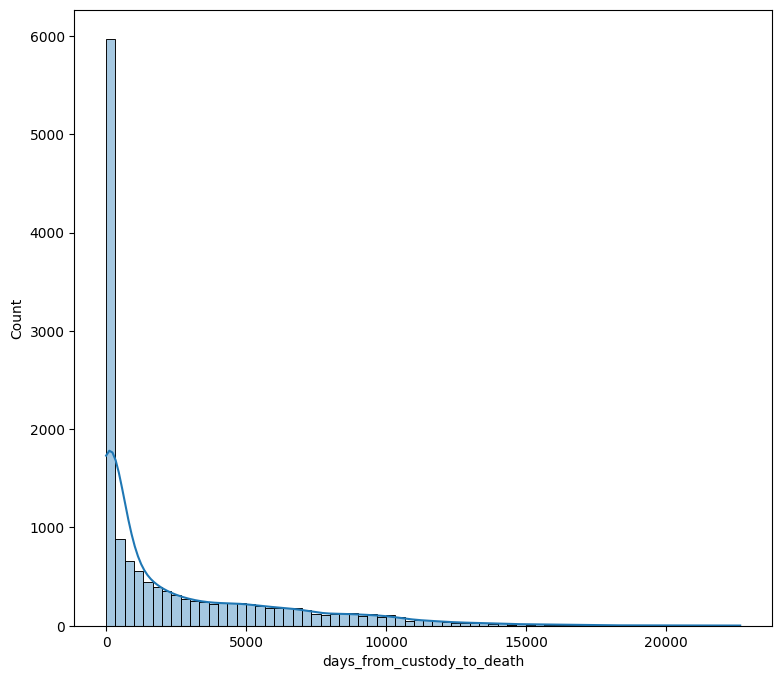

In [8]:
#Days from custody to death is in a string right now. Convert to numeric
df['days_from_custody_to_death'] = pd.to_numeric(df['days_from_custody_to_death'])
print(df['days_from_custody_to_death'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['days_from_custody_to_death'], kde=True, alpha = 0.4)

We see some non-sensical ages. We will drop anyone below 17 years of age.

In [9]:
print("Before filtering out by age: ", df.shape[0])
df = df[df['age_at_time_of_death'] >= 17]
print("After filtering out by age: ", df.shape[0])

Before filtering out by age:  14287
After filtering out by age:  14187


count    14187.000000
mean        50.523648
std         15.515306
min         17.000000
25%         39.000000
50%         52.000000
75%         62.000000
max         93.000000
Name: age_at_time_of_death, dtype: float64


<Axes: xlabel='age_at_time_of_death', ylabel='Count'>

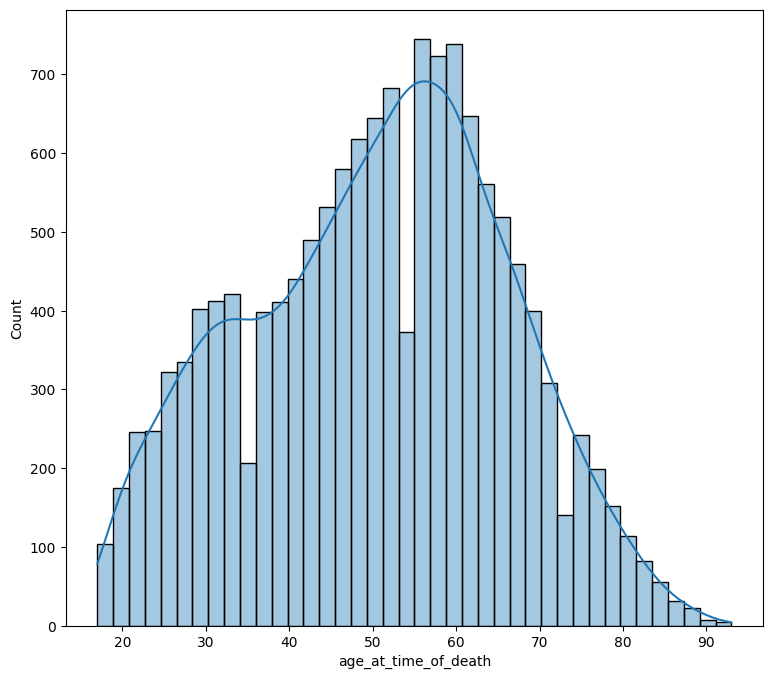

In [10]:
print(df['age_at_time_of_death'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['age_at_time_of_death'], kde=True, alpha = 0.4)

<Axes: ylabel='Count'>

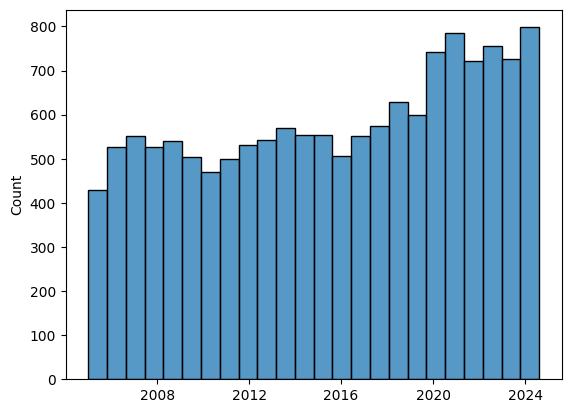

In [11]:
from datetime import datetime


sns.histplot([datetime.strptime(item, '%Y-%m-%d %H:%M:%S') for item in df['death_date']])

Look at non-numeric values

In [12]:
#Look at unique values for each field
counts = df.nunique()
counts

,0
date_time_of_custody_or_incident,10721
name_full,14013
date_of_birth,10258
age_at_time_of_death,77
sex,2
race,4
death_date,6074
death_date_and_time,13336
death_location_county,223
death_location_city,737


In [13]:
#Graph fields for which there are less than 10 unique values
cols_to_keep = counts[counts <= 10].index
df_graphunique = df[cols_to_keep]

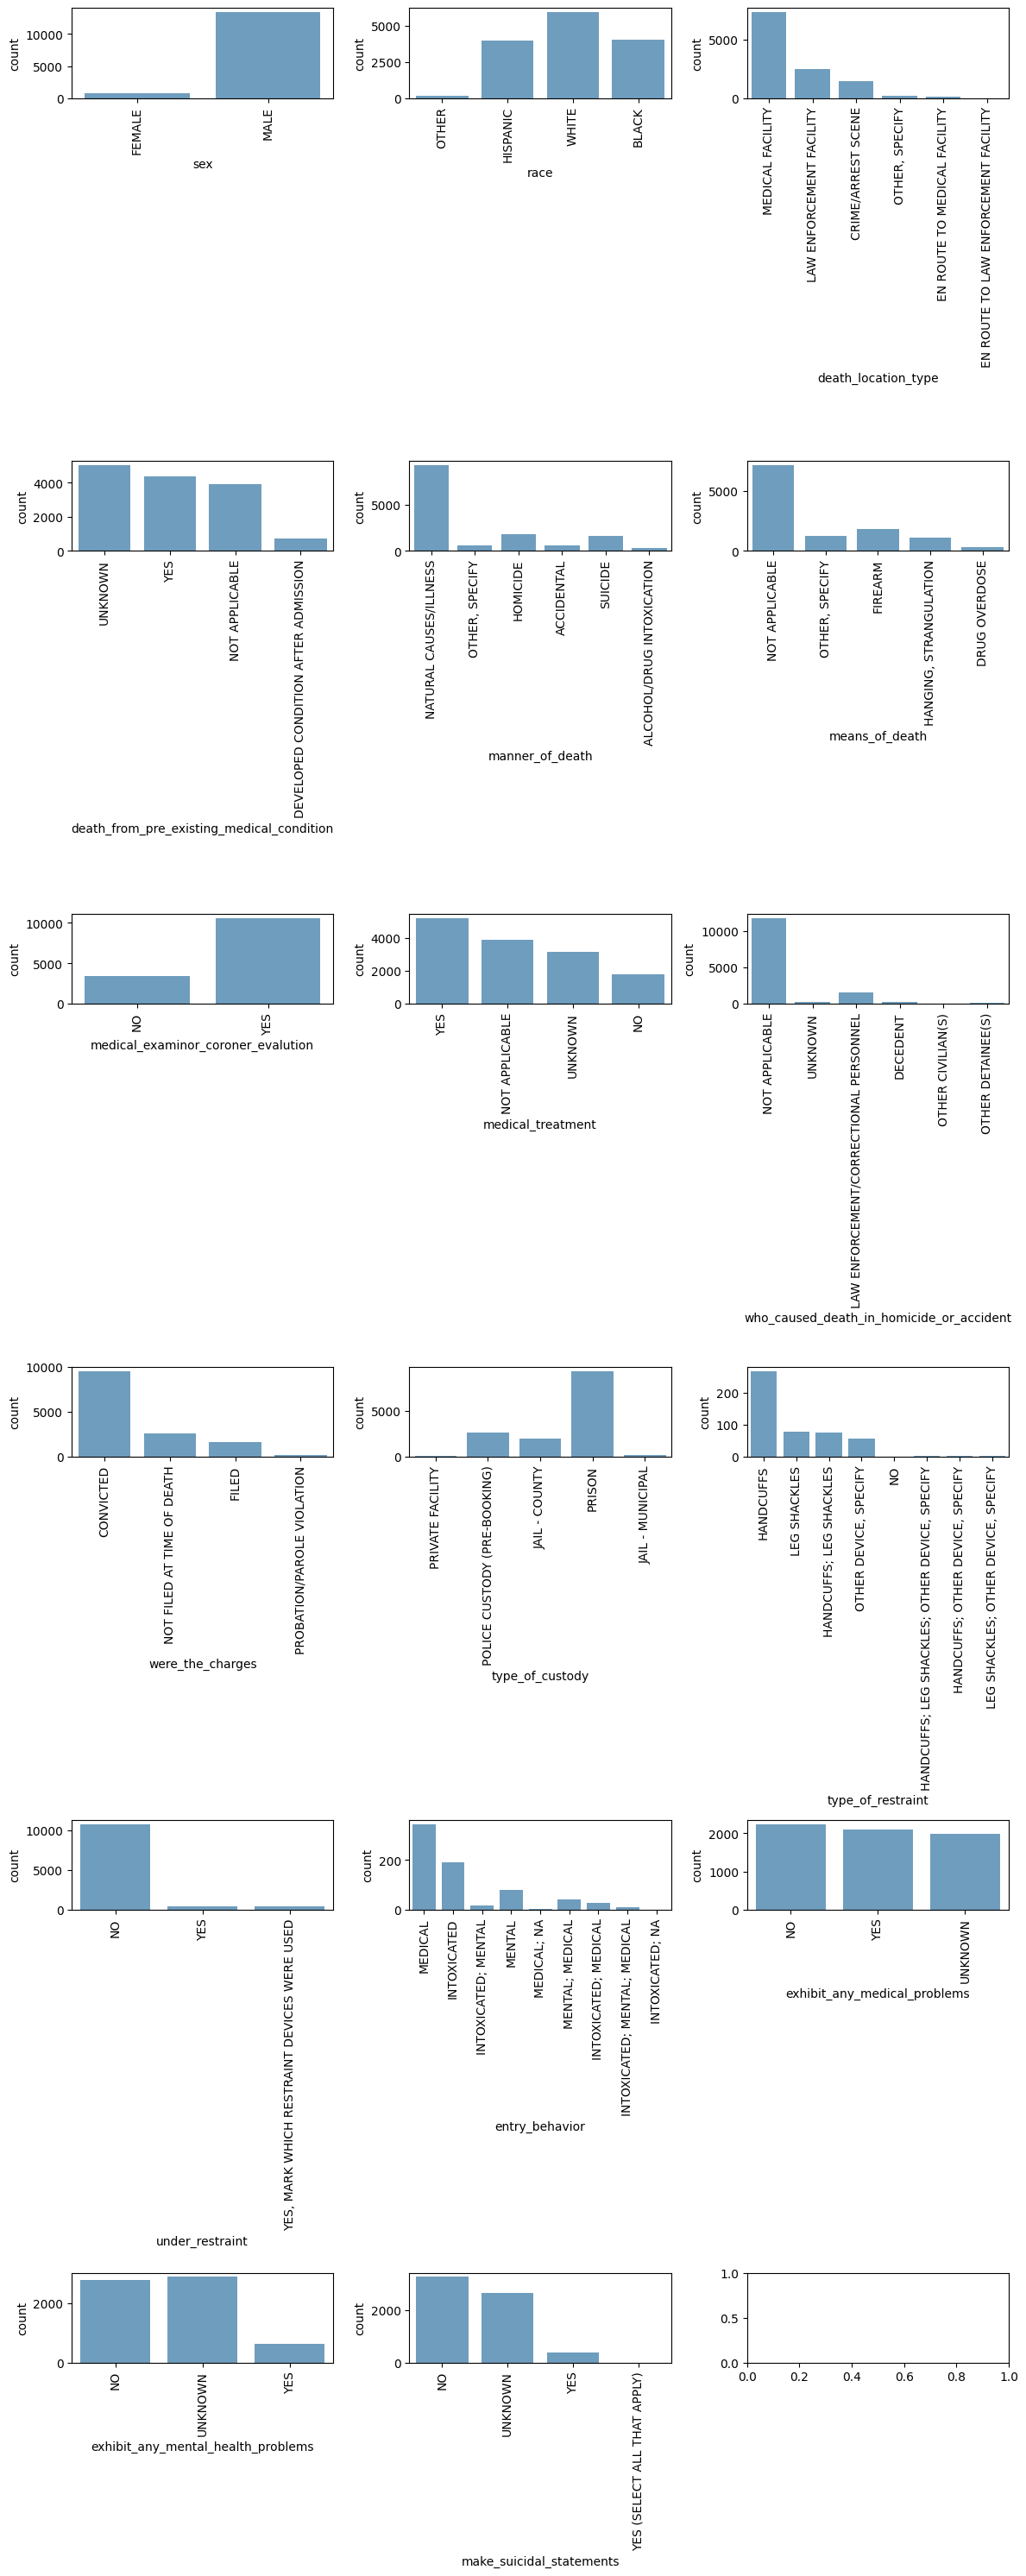

In [14]:
fig, axes = plt.subplots(round(len(df_graphunique.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_graphunique.columns):
        ax.tick_params(axis='x', rotation=90)
        sns.countplot(x=df_graphunique.columns[i], alpha=0.7, data=df_graphunique, ax=ax)

fig.tight_layout()

# Identify NA and impute

For any values labeled as "UNKNOWN" or "NOT APPLICABLE", mark as NA

In [15]:
df[df == 'NOT APPLICABLE'] = np.nan
df[df == 'UNKNOWN'] = np.nan

Look for NA values

In [16]:
df_na = df.isnull()
df_na = df_na.mean()
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
who_caused_death_in_homicide_or_accident_other,0.997462
other_behavior,0.988088
death_location_type_other,0.977938
type_of_restraint,0.965461
means_of_death_other,0.954747
entry_behavior,0.949249
type_of_offense_other,0.896384
who_caused_death_in_homicide_or_accident,0.849581
offense_3,0.759710
exhibit_any_mental_health_problems,0.759498


Text(0.5, 1.0, 'Percent missing data by features')

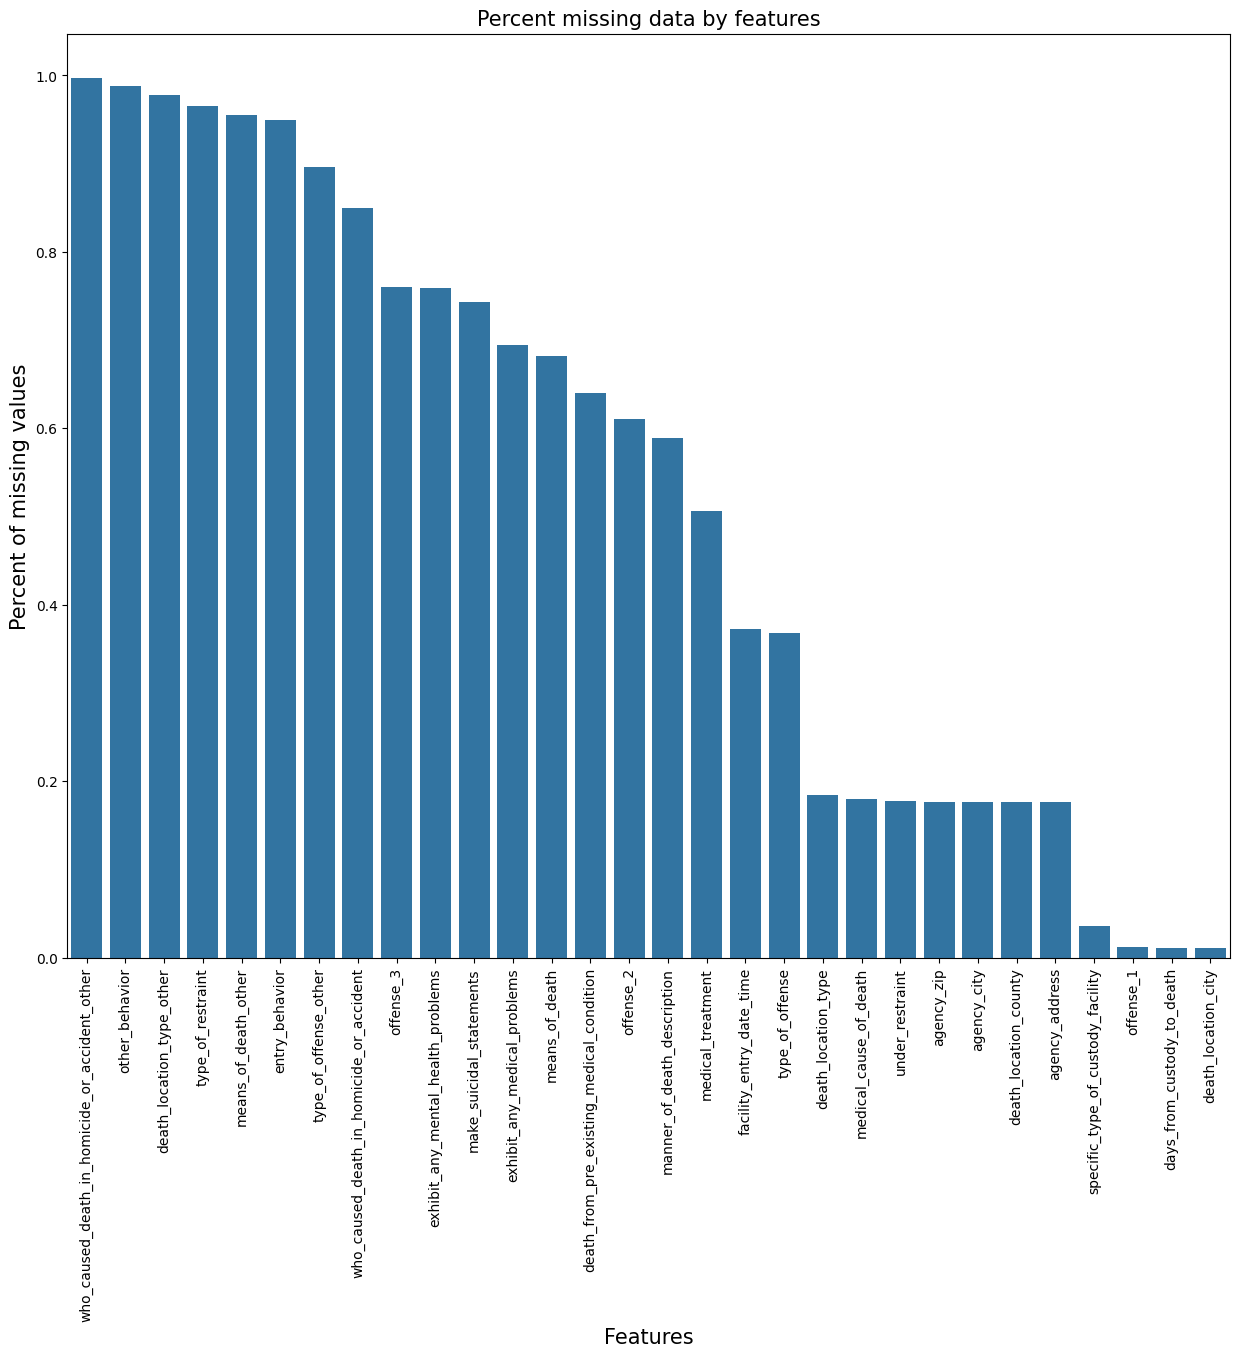

In [17]:
# Visualize the missing ratios
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

Some of these fields would confound our model. For example, "who_caused_death_in_homicide_or_accident" and its respective "other" field would always predict "homicide" or "accident" as cause of death if not empty.

Therefore, we will drop these columns

In [18]:
df.drop(columns=['who_caused_death_in_homicide_or_accident',
                 'who_caused_death_in_homicide_or_accident_other',
                 'means_of_death',
                 'means_of_death_other'], inplace=True)

Let us assume that nan in the following columns corresponds to no


*   Exhibit_any_mental_health_problems
*   Medical_examinor_coroner_evaluation



In [19]:
for col in ['exhibit_any_mental_health_problems', 'medical_examinor_coroner_evalution']:
  df[col] = df[col].fillna('NO')

Let us assume that nan in the following columns corresponds to 0


*   Days_from_custody_to_death



In [20]:
for col in ['days_from_custody_to_death']:
  df[col] = df[col].fillna(0)

regenerate missing ratios

In [21]:
df['manner_of_death_description'].nunique()

2155

In [22]:
df_na = df.isnull()
df_na = df_na.mean()
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
other_behavior,0.988088
death_location_type_other,0.977938
type_of_restraint,0.965461
entry_behavior,0.949249
type_of_offense_other,0.896384
offense_3,0.759710
make_suicidal_statements,0.743004
exhibit_any_medical_problems,0.693875
death_from_pre_existing_medical_condition,0.640375
offense_2,0.610348


Clean "offense"–we will categorize it into three categories: sexual, violent, non-violent (includes drug-related crimes, fraud, parole violation, bond violation, DWI). All other offenses are difficult to parse.

In [23]:
df['offense_1'].unique().shape

(4168,)

In [24]:
def categorize_offense(x):

  if 'sex' in str(x).lower():
    return 'Sexual'

  elif 'indecen' in str(x).lower():
    return 'Sexual'

  elif 'child' in str(x).lower():
    return 'Sexual'

  elif 'minor' in str(x).lower():
    return 'Sexual'

  elif 'lewd' in str(x).lower():
    return 'Sexual'

  elif 'rape' in str(x).lower():
    return 'Sexual'

  elif 'traffick' in str(x).lower():
    return 'Sexual'

  elif 'rob' in str(x).lower():
    return 'Non-violent'

  elif 'theft' in str(x).lower():
    return 'Non-violent'

  elif 'drug' in str(x).lower():
    return 'Non-violent'

  elif 'meth' in str(x).lower():
    return 'Non-violent'

  elif 'amphet' in str(x).lower():
    return 'Non-violent'

  elif 'mari' in str(x).lower():
    return 'Non-violent'

  elif 'cocaine' in str(x).lower():
    return 'Non-violent'

  elif 'heroin' in str(x).lower():
    return 'Non-violent'

  elif 'subst' in str(x).lower():
    return 'Non-violent'

  elif 'burg' in str(x).lower():
    return 'Non-violent'

  elif 'evad' in str(x).lower():
    return 'Non-violent'

  elif 'dwi' in str(x).lower():
    return 'Non-violent'

  elif 'fraud' in str(x).lower():
    return 'Non-violent'

  elif 'entry' in str(x).lower():
    return 'Non-violent'

  elif 'resist' in str(x).lower():
    return 'Non-violent'

  elif 'parole' in str(x).lower():
    return 'Non-violent'

  elif 'bond' in str(x).lower():
    return 'Non-violent'

  elif 'marijuana' in str(x).lower():
    return 'Non-violent'

  elif 'forg' in str(x).lower():
    return 'Non-violent'

  elif 'prostit' in str(x).lower():
    return 'Non-violent'

  elif 'eviden' in str(x).lower():
    return 'Non-violent'

  elif 'mental' in str(x).lower():
    return 'Non-violent'

  elif 'bail' in str(x).lower():
    return 'Non-violent'

  elif 'traffi' in str(x).lower():
    return 'Non-violent'

  elif 'driv' in str(x).lower():
    return 'Non-violent'

  elif 'property' in str(x).lower():
    return 'Non-violent'

  elif 'speed' in str(x).lower():
    return 'Non-violent'

  elif 'influe' in str(x).lower():
    return 'Non-violent'

  elif 'narc' in str(x).lower():
    return 'Non-violent'

  elif 'psych' in str(x).lower():
    return 'Non-violent'

  elif 'mischief' in str(x).lower():
    return 'Non-violent'

  elif 'tresp' in str(x).lower():
    return 'Non-violent'

  elif 'poss' in str(x).lower():
    return 'Non-violent'

  elif 'crimin' in str(x).lower():
    return 'Non-violent'

  elif 'driv' in str(x).lower():
    return 'Non-violent'

  elif 'credit' in str(x).lower():
    return 'Non-violent'

  elif 'violat' in str(x).lower():
    return 'Non-violent'

  elif 'contempt' in str(x).lower():
    return 'Non-violent'

  elif 'escape' in str(x).lower():
    return 'Non-violent'

  elif 'license' in str(x).lower():
    return 'Non-violent'

  elif 'tamper' in str(x).lower():
    return 'Non-violent'

  elif 'deliv' in str(x).lower():
    return 'Non-violent'

  elif 'shopl' in str(x).lower():
    return 'Non-violent'

  elif 'deten' in str(x).lower():
    return 'Violent'

  elif 'intox' in str(x).lower():
    return 'Violent'

  elif 'murder' in str(x).lower():
    return 'Violent'

  elif 'terrorist' in str(x).lower():
    return 'Violent'

  elif 'deadly' in str(x).lower():
    return 'Violent'

  elif 'assault' in str(x).lower():
    return 'Violent'

  elif 'assualt' in str(x).lower():
    return 'Violent'

  elif 'asslt' in str(x).lower():
    return 'Violent'

  elif 'agg' in str(x).lower():
    return 'Violent'

  elif 'slaughter' in str(x).lower():
    return 'Violent'

  elif 'mansl' in str(x).lower():
    return 'Violent'

  elif 'arson' in str(x).lower():
    return 'Violent'

  elif 'aslt' in str(x).lower():
    return 'Violent'

  elif 'injur' in str(x).lower():
    return 'Violent'

  elif 'firearm' in str(x).lower():
    return 'Violent'

  elif 'homic' in str(x).lower():
    return 'Violent'

  elif 'violen' in str(x).lower():
    return 'Violent'

  elif 'der' in str(x).lower():
    return 'Violent'

  elif 'kidnap' in str(x).lower():
    return 'Violent'

  else:
    return np.nan

In [25]:
df['Offense'] = df['offense_1'].apply(categorize_offense)
offenses = df[df['Offense'].isna()]
print(offenses.shape)

(816, 41)


In [26]:
#Drop prisoners with offense NA
print("Before dropping Offenses categorized as NA: ", df.shape[0])
df = df.dropna(subset=['Offense'])
print("After dropping Offenses categorized as NA: ", df.shape[0])

Before dropping Offenses categorized as NA:  14187
After dropping Offenses categorized as NA:  13371


In [27]:
#Drop offense_1, offense_2, offense_3
df = df.drop(['offense_1', 'offense_2', 'offense_3'], axis=1)

In [28]:
#impute NA days_from_death with mean

mean_days = df['days_from_custody_to_death'].mean()
df['days_from_custody_to_death'] = df['days_from_custody_to_death'].fillna(mean_days)

# Selecting records

Look at only those who were in jail or prison

In [29]:
print(df['type_of_custody'].unique())
print('Before dropping deaths during booking: ', df.shape)
df = df[df['type_of_custody'] != 'POLICE CUSTODY (PRE-BOOKING)']
print('After dropping deaths during booking: ', df.shape)

['POLICE CUSTODY (PRE-BOOKING)' 'JAIL - COUNTY' 'PRISON'
 'PRIVATE FACILITY' 'JAIL - MUNICIPAL']
Before dropping deaths during booking:  (13371, 38)
After dropping deaths during booking:  (11114, 38)


In [30]:
#Agency_zip should be treated as a categorical value
df["agency_zip"]=df["agency_zip"].astype(str)
print('Number of zip codes: ', df["agency_zip"].nunique())
print('Number of counties: ', df["agency_county"].nunique())
print('Number of cities: ', df["agency_city"].nunique())
print('Number of jails: ', df["agency_name"].nunique())

print('Number of counties where death happened: ', df["death_location_county"].nunique())
print('Number of cities where death happened: ', df["death_location_city"].nunique())
#Agency counties will be most meaningful/feasible to look at

Number of zip codes:  289
Number of counties:  188
Number of cities:  257
Number of jails:  295
Number of counties where death happened:  201
Number of cities where death happened:  432


In [31]:
def extract_time(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'

In [32]:
#Clean date into time of day
df['death_date_and_time'] = pd.to_datetime(df['death_date_and_time'])
df['time_of_day'] = df['death_date_and_time'].dt.hour.apply(extract_time)
print(df['time_of_day'])

2            night
3        afternoon
4          morning
5          morning
8            night
           ...    
14278        night
14280      morning
14281    afternoon
14282        night
14283        night
Name: time_of_day, Length: 11114, dtype: object


Dropping all unused variables

In [33]:
df = df.drop(['date_time_of_custody_or_incident', 'name_full', 'date_of_birth',
         'death_date',
       'death_date_and_time', 'death_location_county', 'death_location_city', 'death_location_type',
         'death_location_type_other','manner_of_death_description',
         'medical_examinor_coroner_evalution',
       'medical_treatment', 'type_of_offense',
       'type_of_offense_other', 'were_the_charges', 'facility_entry_date_time',
        'specific_type_of_custody_facility',
       'agency_address', 'agency_city', 'agency_name', 'agency_county',
       'agency_zip', 'type_of_restraint', 'under_restraint', 'entry_behavior',
       'other_behavior', 'exhibit_any_medical_problems',
       'exhibit_any_mental_health_problems', 'make_suicidal_statements', 'medical_cause_of_death'], axis = 1)

Drop all deaths caused by "other" circumstances.

In [34]:
print("Total number of prisoners: ", df.shape)
df = df[df['manner_of_death'] != 'OTHER, SPECIFY']
print("After dropping 'OTHER' deaths: ", df.shape)

Total number of prisoners:  (11114, 9)
After dropping 'OTHER' deaths:  (10713, 9)


Create variable for whether prisoner displayed history of medical problems (medical). If there is no information (Na) we will assume that there were no health problems

In [35]:
df['Medical'] = np.where(
    (df['death_from_pre_existing_medical_condition'] == "YES") |
    (df['death_from_pre_existing_medical_condition'] == "DEVELOPED CONDITION AFTER ADMISSION"),
    True,
    False
)
df = df.drop(['death_from_pre_existing_medical_condition'], axis = 1)

<ipython-input-35-84692092114e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medical'] = np.where(


<ipython-input-36-4a4cd8406322>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='manner_of_death', data=df, palette='Blues')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'NATURAL CAUSES/ILLNESS'),
  Text(1, 0, 'ACCIDENTAL'),
  Text(2, 0, 'SUICIDE'),
  Text(3, 0, 'HOMICIDE'),
  Text(4, 0, 'ALCOHOL/DRUG INTOXICATION')])

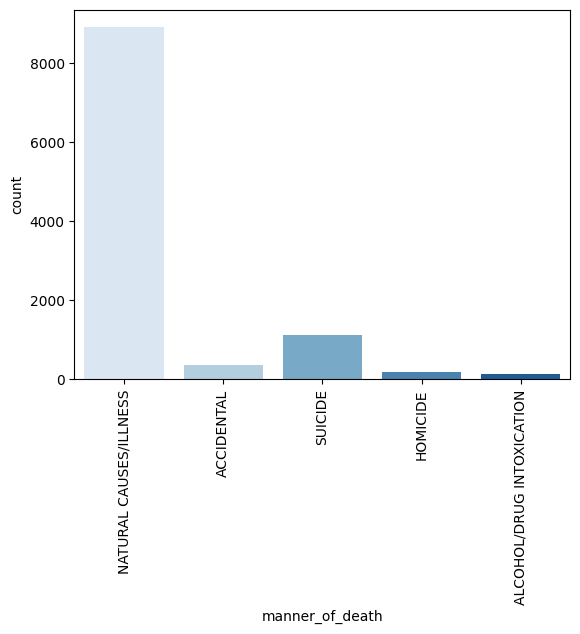

In [36]:
#Plot the manner of death

sns.countplot(x='manner_of_death', data=df, palette='Blues')
plt.xticks(rotation=90)

In [37]:
#Because of the imbalance, we will group unnatural deaths
df['Natural'] = df['manner_of_death'].replace({
  'NATURAL CAUSES/ILLNESS': 'Natural',
  'ACCIDENTAL': 'Unnatural',
  'SUICIDE': 'Unnatural',
  'HOMICIDE': 'Unnatural',
  'ALCOHOL/DRUG INTOXICATION': 'Unnatural'})

<ipython-input-38-0f0f1fe51d5b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Natural', data=df, palette='Blues')


([0, 1], [Text(0, 0, 'Natural'), Text(1, 0, 'Unnatural')])

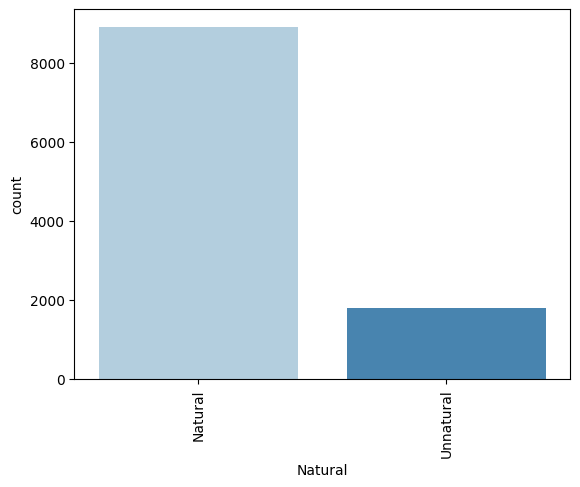

In [38]:
sns.countplot(x='Natural', data=df, palette='Blues')
plt.xticks(rotation=90)

<ipython-input-39-89c2d555144c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=df, palette='Blues')


race
WHITE       4609
BLACK       3120
HISPANIC    2888
OTHER         93
Name: count, dtype: int64


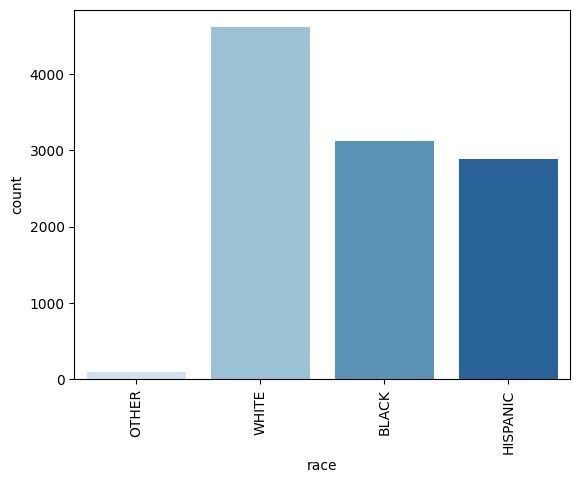

In [39]:
sns.countplot(x='race', data=df, palette='Blues')
plt.xticks(rotation=90)
print(df['race'].value_counts())

Divide dataframe into races. We will ignore 'OTHER' races because 1) the group is too diverse to draw meaningful conclusions and 2) the group is much smaller than the rest (n=154).

In [40]:
print('Before dropping race OTHER: ', df.shape[0])
df = df[df['race']!='OTHER']
print('After dropping race OTHER: ', df.shape[0])
df_white = df[df['race']=='WHITE']
df_black = df[df['race']=='BLACK']
df_hispanic = df[df['race']=='HISPANIC']

Before dropping race OTHER:  10713
After dropping race OTHER:  10620


In [41]:
print('White prisoners: ', df_white.shape)
print('Black prisoners: ', df_black.shape)
print('Hispanic prisoners: ', df_hispanic.shape)

White prisoners:  (4609, 10)
Black prisoners:  (3120, 10)
Hispanic prisoners:  (2888, 10)


# White logistic regression (dry-run)

First, create the features and label

In [42]:
from sklearn.preprocessing import LabelEncoder

df_white_Y = df_white['Natural']

df_white_X = df_white[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [43]:
print(df_white['Natural'])

3          Natural
4          Natural
10         Natural
11         Natural
13         Natural
           ...    
14248    Unnatural
14253      Natural
14254    Unnatural
14255      Natural
14265      Natural
Name: Natural, Length: 4609, dtype: object


Split into validation and testing dataset

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

We will need to develop a pipeline that will preprocess (scale + one-hot encode) if we want to use cross-validation. https://towardsdatascience.com/clean-efficient-data-pipelines-with-pythons-sklearn-2472de04c0ea

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), ['age_at_time_of_death']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['sex', 'Offense'])
])

In [45]:
##IGNORE THIS FOR NOW
"""
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cols = ('sex', 'death_location_county', 'Offense')

for c in cols:
    lbl = OneHotEncoder(sparse_output=False)

    encoded = lbl.fit_transform(df_white[[c]])

    encoded_name = lbl.get_feature_names_out([c])

    encoded_df = pd.DataFrame(encoded, columns=encoded_name)

    df_white.drop(c, axis=1).join(encoded_df)
"""

"\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\n\ncols = ('sex', 'death_location_county', 'Offense')\n\nfor c in cols:\n    lbl = OneHotEncoder(sparse_output=False)\n\n    encoded = lbl.fit_transform(df_white[[c]])\n\n    encoded_name = lbl.get_feature_names_out([c])\n\n    encoded_df = pd.DataFrame(encoded, columns=encoded_name)\n\n    df_white.drop(c, axis=1).join(encoded_df)\n"

Define the model. Note that sklearn applies **regularization by default** (C=1)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

Next, we will build the pipeline that will govern each iteration of cross validation

In [47]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model)
])

Run 10-fold cross-validation. We may consider stratification

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

In [49]:
cv_results

array([0.85365854, 0.87804878, 0.87804878, 0.87533875, 0.85636856,
       0.85636856, 0.86449864, 0.88586957, 0.86413043, 0.86956522])

Perform GridSearchCV to find the best regularization penalty C (https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_)

best_model = gridsearch.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 0.012742749857031334, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


Check the encoding

In [ ]:
#Check the one-hot encoding:
preprocess_pipeline = best_model.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1]

#Check the categories of the one-hot encoding:
categories = one_hot.categories_

print(categories)

#Check the label encoding:
model = best_model.named_steps['model']
print(model.classes_)

Evaluate using test data

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

Check the weights

In [ ]:
weights = best_model.named_steps['model'].coef_

col_names = ('Age', 'Female', 'Male', 'Non-violent', 'Sexual', 'Violent')

coeff_df_white = pd.DataFrame(best_model.named_steps['model'].coef_, columns = col_names, index = ['Unnatural causes'])
coeff_df_white = coeff_df_white.reset_index().rename(columns={'index': 'Cause'})
print(coeff_df_white)

              Cause       Age    Female      Male  Non-violent    Sexual  \
0  Unnatural causes -1.639684 -0.726606 -0.707435    -0.437586 -0.776087   

    Violent  
0 -0.220368  


Performance metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[527  23]
 [ 38  44]]
              precision    recall  f1-score   support

     Natural       0.93      0.96      0.95       550
   Unnatural       0.66      0.54      0.59        82

    accuracy                           0.90       632
   macro avg       0.79      0.75      0.77       632
weighted avg       0.90      0.90      0.90       632



# Black population logistic regression

In [ ]:
df_black_X = df_black[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

df_black_Y = df_black['Natural']

X_train, X_test, y_train, y_test = train_test_split(df_black_X, df_black_Y, test_size=0.2)

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), ['age_at_time_of_death']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['sex', 'Offense'])
])

model_black = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_black)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')


print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.90532544 0.90532544 0.8816568  0.86982249 0.875      0.88690476
 0.91666667 0.875      0.91071429 0.89285714] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 0.08858667904100823, 'model__penalty': 'l2', 'model__solver': 'liblinear'} 
-------------------------------
Test accuracy:  0.8622327790973872


In [ ]:
preprocess_pipeline = best_model.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1]

#Check the categories of the one-hot encoding:
categories = one_hot.categories_

print('Features: ', categories, "\n-------------------------------")

#Check the label encoding:
model = best_model.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

Features:  [array(['FEMALE', 'MALE'], dtype=object), array(['Non-violent', 'Sexual', 'Violent'], dtype=object)] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [ ]:
weights = best_model.named_steps['model'].coef_

col_names = ('Age', 'Female', 'Male', 'Non-violent', 'Sexual', 'Violent')

coeff_df_black = pd.DataFrame(best_model.named_steps['model'].coef_, columns = col_names, index = ['Unnatural causes'])
coeff_df_black = coeff_df_black.reset_index().rename(columns={'index': 'Cause'})
print(coeff_df_black)

              Cause       Age    Female    Male  Non-violent    Sexual  \
0  Unnatural causes -1.270998 -0.661963 -0.7113    -0.498095 -0.612228   

   Violent  
0 -0.26294  


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[352   9]
 [ 49  11]]
              precision    recall  f1-score   support

     Natural       0.88      0.98      0.92       361
   Unnatural       0.55      0.18      0.28        60

    accuracy                           0.86       421
   macro avg       0.71      0.58      0.60       421
weighted avg       0.83      0.86      0.83       421



# Hispanic population logistic regression

In [ ]:
df_hispanic_X = df_hispanic[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

df_hispanic_Y = df_hispanic['Natural']

X_train, X_test, y_train, y_test = train_test_split(df_hispanic_X, df_hispanic_Y, test_size=0.2)

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), ['age_at_time_of_death']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['sex', 'Offense'])
])

model_hispanic = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_hispanic)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.90062112 0.90062112 0.8447205  0.9068323  0.8757764  0.86956522
 0.9068323  0.88198758 0.9        0.9       ] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 4.281332398719396, 'model__penalty': 'l2', 'model__solver': 'lbfgs'} 
-------------------------------
Test accuracy:  0.8681592039800995


In [ ]:
preprocess_pipeline = best_model.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1]

#Check the categories of the one-hot encoding:
categories = one_hot.categories_

print('Features: ', categories, "\n-------------------------------")

#Check the label encoding:
model = best_model.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

Features:  [array(['FEMALE', 'MALE'], dtype=object), array(['Non-violent', 'Sexual', 'Violent'], dtype=object)] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [ ]:
weights = best_model.named_steps['model'].coef_

col_names = ('Age', 'Female', 'Male', 'Non-violent', 'Sexual', 'Violent')

coeff_df_hisp = pd.DataFrame(best_model.named_steps['model'].coef_, columns = col_names, index = ['Unnatural causes'])
coeff_df_hisp = coeff_df_hisp.reset_index().rename(columns={'index': 'Cause'})
print(coeff_df_hisp)

              Cause       Age    Female      Male  Non-violent    Sexual  \
0  Unnatural causes -1.739371 -0.781107 -0.502055    -0.632093 -0.501443   

    Violent  
0 -0.149626  


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[442  26]
 [ 58  52]]
              precision    recall  f1-score   support

     Natural       0.88      0.94      0.91       468
   Unnatural       0.67      0.47      0.55       110

    accuracy                           0.85       578
   macro avg       0.78      0.71      0.73       578
weighted avg       0.84      0.85      0.84       578



In [43]:
def visualize_weights(df_white, df_black, df_hisp):

  #Melt each dataframe into a long format
  df_white_melt = df_white.melt(id_vars = 'Cause', var_name = 'Feature', value_name='Weight')
  df_black_melt = df_black.melt(id_vars = 'Cause', var_name = 'Feature', value_name='Weight')
  df_hisp_melt = df_hisp.melt(id_vars = 'Cause', var_name = 'Feature', value_name='Weight')

  #Add race to long dfs
  df_white_melt['race'] = 'White'
  df_black_melt['race'] = 'Black'
  df_hisp_melt['race'] = 'Hispanic'

  #Combine the long dfs
  df_vis = pd.concat([df_white_melt, df_black_melt, df_hisp_melt])

  causes = df_vis['Cause'].unique()

  for cause in causes:

    cause_df = df_vis[df_vis['Cause']==cause]

    sns.barplot(x='Feature', y='Weight', hue='race',
              data=cause_df, ci=None, palette='muted')

    plt.title(f'Death by {cause}')

    plt.axhline(y=0)

    plt.xticks(rotation=90)

    plt.show()

In [44]:
visualize_weights(coeff_df_white, coeff_df_black, coeff_df_hisp)

NameError: name 'coeff_df_white' is not defined

#SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

In [ ]:
df_white = df[df['race']=='WHITE']
df_black = df[df['race']=='BLACK']
df_hispanic = df[df['race']=='HISPANIC']

In [ ]:
df_white_Y = df_white['Natural']
df_white_X = df_white[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

Repeat the logistic regression by first trying SMOTE to address imbalanced classes

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), ['age_at_time_of_death']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['sex', 'Offense'])
])

Check the performance of the new logistic regression with this change

In [ ]:
model_white = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('model', model_white)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.80216802 0.82926829 0.82384824 0.78590786 0.80487805 0.79945799
 0.80487805 0.81793478 0.80163043 0.78804348] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 0.03359818286283781, 'model__penalty': 'l2', 'model__solver': 'lbfgs'} 
-------------------------------
Test accuracy:  0.797180043383948


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[576 157]
 [ 30 159]]
              precision    recall  f1-score   support

     Natural       0.95      0.79      0.86       733
   Unnatural       0.50      0.84      0.63       189

    accuracy                           0.80       922
   macro avg       0.73      0.81      0.75       922
weighted avg       0.86      0.80      0.81       922



This helped with the lopsided recall, though at the expense of overall precision. The minority class is still underrepresented, so let's shift the sampling strategy to 'minority.'

In [ ]:
model_white = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='minority')),
    ('model', model_white)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.8102981  0.83197832 0.82655827 0.78319783 0.80487805 0.80487805
 0.79403794 0.82065217 0.80706522 0.78532609] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 1438.44988828766, 'model__penalty': 'l2', 'model__solver': 'liblinear'} 
-------------------------------
Test accuracy:  0.797180043383948


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[576 157]
 [ 30 159]]
              precision    recall  f1-score   support

     Natural       0.95      0.79      0.86       733
   Unnatural       0.50      0.84      0.63       189

    accuracy                           0.80       922
   macro avg       0.73      0.81      0.75       922
weighted avg       0.86      0.80      0.81       922



In [ ]:
model_white = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='not majority')),
    ('model', model_white)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.82384824 0.83197832 0.82384824 0.78590786 0.81571816 0.80216802
 0.79132791 0.81793478 0.80706522 0.7826087 ] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 0.012742749857031334, 'model__penalty': 'l2', 'model__solver': 'lbfgs'} 
-------------------------------
Test accuracy:  0.7982646420824295


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[577 156]
 [ 30 159]]
              precision    recall  f1-score   support

     Natural       0.95      0.79      0.86       733
   Unnatural       0.50      0.84      0.63       189

    accuracy                           0.80       922
   macro avg       0.73      0.81      0.75       922
weighted avg       0.86      0.80      0.81       922



# White logistic regression (all features)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
df_white = df[df['race']=='WHITE']

df_white_Y = df_white['Natural']
df_white_X = df_white.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

In [ ]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

In [ ]:
preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_white = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_white)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.91869919 0.88617886 0.89430894 0.88346883 0.90514905 0.90243902
 0.91327913 0.93206522 0.91032609 0.9076087 ] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 1.623776739188721, 'model__penalty': 'l2', 'model__solver': 'saga'} 
-------------------------------
Test accuracy:  0.9045553145336226


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[728  30]
 [ 58 106]]
              precision    recall  f1-score   support

     Natural       0.93      0.96      0.94       758
   Unnatural       0.78      0.65      0.71       164

    accuracy                           0.90       922
   macro avg       0.85      0.80      0.82       922
weighted avg       0.90      0.90      0.90       922



# Black logistic regression (all features)

In [ ]:
df_black_Y = df_black['Natural']
df_black_X = df_black.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_black_X, df_black_Y, test_size=0.2)

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), ['age_at_time_of_death']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['sex', 'Offense'])
])

model_black = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_black)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')


print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.868      0.864      0.884      0.88       0.884      0.896
 0.85542169 0.87148594 0.89959839 0.86345382] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 1.623776739188721, 'model__penalty': 'l2', 'model__solver': 'liblinear'} 
-------------------------------
Test accuracy:  0.8653846153846154


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[521  25]
 [ 59  19]]
              precision    recall  f1-score   support

     Natural       0.90      0.95      0.93       546
   Unnatural       0.43      0.24      0.31        78

    accuracy                           0.87       624
   macro avg       0.67      0.60      0.62       624
weighted avg       0.84      0.87      0.85       624



# Hispanic logistic regression (all features)

In [ ]:
df_hispanic_Y = df_hispanic['Natural']
df_hispanic_X = df_hispanic.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_hispanic_X, df_hispanic_Y, test_size=0.2)

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), ['age_at_time_of_death']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['sex', 'Offense'])
])

model_black = LogisticRegression()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_black)
])

cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')


print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['lbfgs','liblinear', 'saga']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.85714286 0.87445887 0.88311688 0.84848485 0.87012987 0.86147186
 0.86580087 0.87012987 0.83116883 0.86580087] 
-------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyperparameters: {'model__C': 0.23357214690901212, 'model__penalty': 'l2', 'model__solver': 'lbfgs'} 
-------------------------------
Test accuracy:  0.870242214532872


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[459  23]
 [ 52  44]]
              precision    recall  f1-score   support

     Natural       0.90      0.95      0.92       482
   Unnatural       0.66      0.46      0.54        96

    accuracy                           0.87       578
   macro avg       0.78      0.71      0.73       578
weighted avg       0.86      0.87      0.86       578



# White logistic regression (w/ forward selection) (NOTE: takes 30 minutes to run; 7 minutes for binary)

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [43]:
df_white = df[df['race']=='WHITE']

df_white_Y = df_white['Natural']
df_white_X = df_white.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

In [44]:
counts = X_train.nunique()
cols_to_keep = counts[counts <= 10].index
X_train_graphunique = X_train[cols_to_keep]

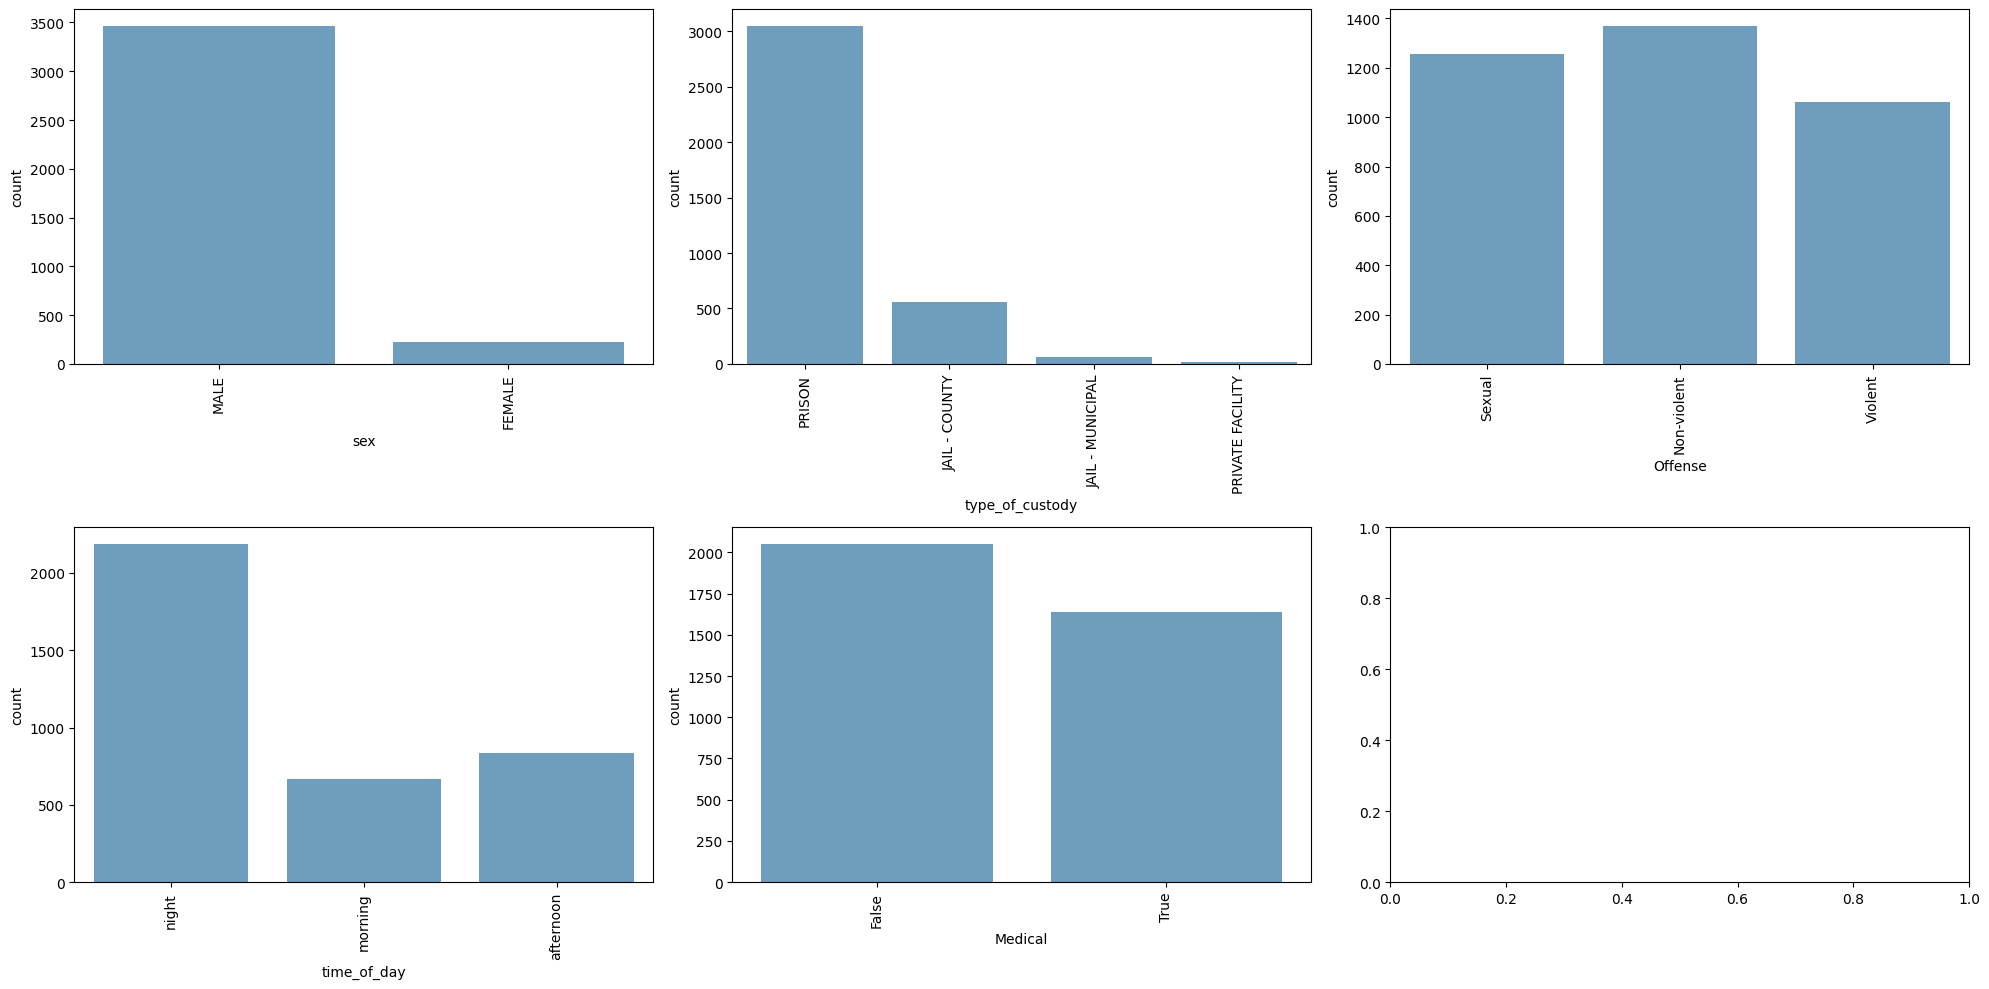

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

axes = axes.flatten()


for i, ax in enumerate(axes[:5]):
    if i < len(df_graphunique.columns):
        ax.tick_params(axis='x', rotation=90)
        sns.countplot(x=X_train_graphunique.columns[i], alpha=0.7, data=X_train_graphunique, ax=ax)

fig.tight_layout()

In [46]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_white = LogisticRegression(max_iter=1000)

sfs_white = SFS(
    estimator = model_white,
    k_features = 'best',
    forward = True,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1
)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('forward_selection', sfs_white),
    ('model', model_white)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-2, 2, 5),
    'model__solver' : ['lbfgs','liblinear']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model_white = gridsearch.best_estimator_

CV-results:
 [0.83197832 0.87804878 0.91056911 0.89701897 0.83739837 0.85094851
 0.89430894 0.85869565 0.86684783 0.87228261] 
-------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'model__C': 10.0, 'model__penalty': 'l2', 'model__solver': 'liblinear'} 
-------------------------------


In [47]:

y_pred = best_model_white.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)


Test accuracy:  0.8622559652928417


In [48]:
"""
#Graph SFS fit
sfs_white.fit(X_train, y_train)

fig = plot_sfs(sfs_white.get_metric_dict(), kind='std_err', figsize=(15, 12))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
"""

"\n#Graph SFS fit\nsfs_white.fit(X_train, y_train)\n\nfig = plot_sfs(sfs_white.get_metric_dict(), kind='std_err', figsize=(15, 12))\n\nplt.title('Sequential Forward Selection (w. StdErr)')\nplt.grid()\nplt.show()\n"

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[647  97]
 [ 30 148]]
              precision    recall  f1-score   support

     Natural       0.96      0.87      0.91       744
   Unnatural       0.60      0.83      0.70       178

    accuracy                           0.86       922
   macro avg       0.78      0.85      0.81       922
weighted avg       0.89      0.86      0.87       922



In [50]:
preprocess_pipeline = best_model_white.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1].get_feature_names_out(categorical_columns)

#Check the categories of the one-hot encoding:
print(one_hot)

print('Features: ', one_hot, "\n-------------------------------")

#Check the label encoding:
model = best_model_white.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True']
Features:  ['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True'] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [51]:
weights_white = best_model_white.named_steps['model'].coef_

sfs_white_steps = best_model_white.named_steps['forward_selection']

all_features = numerical_columns + list(one_hot)
print(all_features)
selected_features_white = [all_features[i] for i in sfs_white_steps.k_feature_idx_]

print(selected_features_white)


col_names = selected_features_white

coeff_df_white = pd.DataFrame(best_model_white.named_steps['model'].coef_, columns = col_names, index = ['Unnatural causes'])
coeff_df_white = coeff_df_white.reset_index().rename(columns={'index': 'Cause'})

print(coeff_df_white)

['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
['age_at_time_of_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'time_of_day_afternoon', 'Medical_False', 'Medical_True']
              Cause  age_at_time_of_death  sex_FEMALE  sex_MALE  \
0  Unnatural causes             -1.746705   -0.513445  0.468539   

   type_of_custody_JAIL - COUNTY  type_of_custody_PRISON  \
0                      -1.126861                 -2.6549   

   type_of_custody_PRIVATE FACILITY  Offense_Non-violent  \
0                          0.607539            -0.274148   

   time_of_day_afterno

# Black logistic regression (w/ forward selection)

In [52]:
df_black_Y = df_black['Natural']
df_black_X = df_black.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_black_X, df_black_Y, test_size=0.2)

In [57]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_black = LogisticRegression(max_iter=1000)

sfs_black = SFS(
    estimator = model_black,
    k_features = 'best',
    forward = True,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1
)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('forward_selection', sfs_black),
    ('model', model_black)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-2, 2, 5),
    'model__solver' : ['lbfgs','liblinear']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model_black = gridsearch.best_estimator_

CV-results:
 [0.784      0.804      0.804      0.812      0.824      0.812
 0.84337349 0.85140562 0.82730924 0.80321285] 
-------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'} 
-------------------------------


In [58]:
y_pred = best_model_black.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

Test accuracy:  0.844551282051282


In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[458  86]
 [ 11  69]]
              precision    recall  f1-score   support

     Natural       0.98      0.84      0.90       544
   Unnatural       0.45      0.86      0.59        80

    accuracy                           0.84       624
   macro avg       0.71      0.85      0.75       624
weighted avg       0.91      0.84      0.86       624



In [60]:
preprocess_pipeline = best_model_black.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1].get_feature_names_out(categorical_columns)

#Check the categories of the one-hot encoding:
print(one_hot)

print('Features: ', one_hot, "\n-------------------------------")

#Check the label encoding:
model = best_model_black.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True']
Features:  ['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True'] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [61]:
weights_black = best_model_black.named_steps['model'].coef_

sfs_black_steps = best_model_black.named_steps['forward_selection']

all_features = numerical_columns + list(one_hot)
print(all_features)
selected_features_black = [all_features[i] for i in sfs_black_steps.k_feature_idx_]

print(selected_features_black)

col_names = selected_features_black

coeff_df_black = pd.DataFrame(best_model_black.named_steps['model'].coef_, columns = col_names, index = ['Unnatural causes'])
coeff_df_black = coeff_df_black.reset_index().rename(columns={'index': 'Cause'})

print(coeff_df_black)

['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'Medical_False', 'Medical_True']
              Cause  age_at_time_of_death  days_from_custody_to_death  \
0  Unnatural causes             -1.418736                    0.311685   

   sex_FEMALE  sex_MALE  type_of_custody_JAIL - MUNICIPAL  \
0      -0.502  0.070317                          0.901882   

   type_of_custody_PRISON  Offense_Sexual  Offense_Violent  \
0               -1.141286        -0.27544         0.2649

# Hispanic logistic regression (w/ forward selection)

In [62]:
df_hispanic_Y = df_hispanic['Natural']
df_hispanic_X = df_hispanic.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_hispanic_X, df_hispanic_Y, test_size=0.2)

In [63]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_hispanic = LogisticRegression(max_iter=1000)

sfs_hispanic = SFS(
    estimator = model_hispanic,
    k_features = 'best',
    forward = True,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1
)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('forward_selection', sfs_hispanic),
    ('model', model_hispanic)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-2, 2, 5),
    'model__solver' : ['lbfgs','liblinear']}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model_hispanic = gridsearch.best_estimator_

CV-results:
 [0.86147186 0.86147186 0.87445887 0.83116883 0.87012987 0.90909091
 0.85714286 0.83116883 0.86580087 0.84848485] 
-------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'} 
-------------------------------


In [64]:
y_pred = best_model_hispanic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

Test accuracy:  0.8615916955017301


In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[394  69]
 [ 11 104]]
              precision    recall  f1-score   support

     Natural       0.97      0.85      0.91       463
   Unnatural       0.60      0.90      0.72       115

    accuracy                           0.86       578
   macro avg       0.79      0.88      0.82       578
weighted avg       0.90      0.86      0.87       578



In [66]:
preprocess_pipeline = best_model_hispanic.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1].get_feature_names_out(categorical_columns)

#Check the categories of the one-hot encoding:
print(one_hot)

print('Features: ', one_hot, "\n-------------------------------")

#Check the label encoding:
model = best_model_hispanic.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True']
Features:  ['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True'] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [67]:
weights_hispanic = best_model_hispanic.named_steps['model'].coef_

sfs_hispanic_steps = best_model_hispanic.named_steps['forward_selection']

all_features = numerical_columns + list(one_hot)
print(all_features)
selected_features_hispanic = [all_features[i] for i in sfs_hispanic_steps.k_feature_idx_]

print(selected_features_hispanic)

col_names = selected_features_hispanic

coeff_df_hispanic = pd.DataFrame(best_model_hispanic.named_steps['model'].coef_, columns = col_names, index = ['Unnatural causes'])
coeff_df_hispanic = coeff_df_hispanic.reset_index().rename(columns={'index': 'Cause'})

print(coeff_df_hispanic)

['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
['age_at_time_of_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
              Cause  age_at_time_of_death  sex_FEMALE  sex_MALE  \
0  Unnatural causes             -1.585986   -0.720945  0.270813   

   type_of_custody_JAIL - MUNICIPAL  type_of_custody_PRISON  \
0                          0.355969               -1.265378   

   type_of_custody_PRIVATE FACILITY  Offense_Non-violent  \
0                         -0.1

<ipython-input-43-55b792eb2993>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Feature', y='Weight', hue='race',


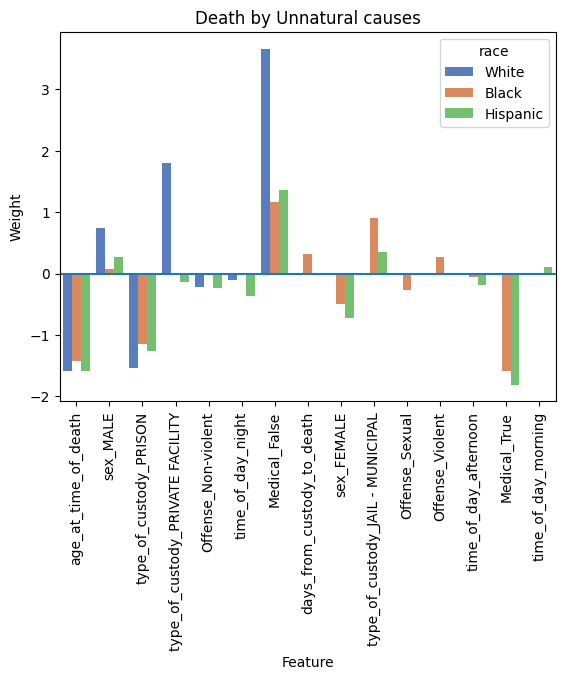

In [68]:
visualize_weights(coeff_df_white, coeff_df_black, coeff_df_hispanic)

# White Naive Bayes (dry-run)

In [ ]:
df_white_Y = df_white['Natural']

df_white_X = df_white[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

numerical_columns = ['age_at_time_of_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_white = GaussianNB()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_white)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__var_smoothing': np.logspace(0, -10, num=10)}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.82384824 0.84552846 0.85094851 0.82926829 0.82113821 0.81842818
 0.84552846 0.83423913 0.83967391 0.87228261] 
-------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'model__var_smoothing': 0.0774263682681127} 
-------------------------------
Test accuracy:  0.8546637744034707


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[697  51]
 [ 83  91]]
              precision    recall  f1-score   support

     Natural       0.89      0.93      0.91       748
   Unnatural       0.64      0.52      0.58       174

    accuracy                           0.85       922
   macro avg       0.77      0.73      0.74       922
weighted avg       0.85      0.85      0.85       922



# Black Naive Bayes (dry-run)

In [ ]:
df_black_Y = df_black['Natural']

df_black_X = df_black[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(df_black_X, df_black_Y, test_size=0.2)

numerical_columns = ['age_at_time_of_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_black = GaussianNB()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_black)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__var_smoothing': np.logspace(0, -10, num=10)}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.888      0.884      0.896      0.86       0.88       0.908
 0.85542169 0.87951807 0.85140562 0.83935743] 
-------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

# Hispanic Naive Bayes (dry-run)

In [ ]:
df_hispanic_Y = df_hispanic['Natural']

df_hispanic_X = df_hispanic[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(df_hispanic_X, df_hispanic_Y, test_size=0.2)

numerical_columns = ['age_at_time_of_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_hispanic = GaussianNB()

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_hispanic)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__var_smoothing': np.logspace(0, -10, num=10)}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.83982684 0.87012987 0.77489177 0.87445887 0.8008658  0.85714286
 0.83982684 0.86580087 0.86147186 0.86147186] 
-------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'model__var_smoothing': 0.0774263682681127} 
-------------------------------
Test accuracy:  0.8650519031141869


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[451  22]
 [ 56  49]]
              precision    recall  f1-score   support

     Natural       0.89      0.95      0.92       473
   Unnatural       0.69      0.47      0.56       105

    accuracy                           0.87       578
   macro avg       0.79      0.71      0.74       578
weighted avg       0.85      0.87      0.85       578



# White Naive Bayes (w/ forward selection). Note: takes 10 minutes

In [69]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [70]:
df_white = df[df['race']=='WHITE']

df_white_Y = df_white['Natural']
df_white_X = df_white.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

In [71]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_white = GaussianNB()

sfs_white = SFS(
    estimator = model_white,
    k_features = 'best',
    forward = True,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1
)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('forward_selection', sfs_white),
    ('model', model_white)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__var_smoothing': np.logspace(0, -10, num=20)}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model_white = gridsearch.best_estimator_

CV-results:
 [0.8699187  0.83197832 0.86449864 0.84281843 0.87262873 0.84552846
 0.82113821 0.88315217 0.87771739 0.89673913] 
-------------------------------
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters: {'model__var_smoothing': 1.438449888287663e-07} 
-------------------------------


In [72]:

y_pred = best_model_white.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)


Test accuracy:  0.8893709327548807


In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[670  79]
 [ 23 150]]
              precision    recall  f1-score   support

     Natural       0.97      0.89      0.93       749
   Unnatural       0.66      0.87      0.75       173

    accuracy                           0.89       922
   macro avg       0.81      0.88      0.84       922
weighted avg       0.91      0.89      0.89       922



In [74]:
preprocess_pipeline = best_model_white.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1].get_feature_names_out(categorical_columns)

#Check the categories of the one-hot encoding:
print(one_hot)

print('Features: ', one_hot, "\n-------------------------------")

#Check the label encoding:
model = best_model_white.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True']
Features:  ['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True'] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [75]:
sfs_white_steps = best_model_white.named_steps['forward_selection']

all_features = numerical_columns + list(one_hot)
print(all_features)
selected_features_white = [all_features[i] for i in sfs_white_steps.k_feature_idx_]

print(selected_features_white)

col_names = selected_features_white

thetas_df_white = pd.DataFrame(best_model_white.named_steps['model'].theta_, columns = col_names, index = ['Natural causes', 'Unnatural causes'])
thetas_df_white = thetas_df_white.reset_index().rename(columns={'index': 'Cause'})

print(thetas_df_white)

['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
['age_at_time_of_death', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_PRISON', 'Offense_Non-violent', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_night', 'Medical_False']
              Cause  age_at_time_of_death  type_of_custody_JAIL - COUNTY  \
0    Natural causes              0.253620                       0.105489   
1  Unnatural causes             -1.153391                       0.390615   

   type_of_custody_PRISON  Offense_Non-violent  Offense_Violent  \
0                0.886905             0.345569         0.272487   
1                0.513752             0.473722         0.359340   

   tim

# Black Naive Bayes (w/ forward selection)

In [76]:
df_black_Y = df_black['Natural']
df_black_X = df_black.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_black_X, df_black_Y, test_size=0.2)

In [77]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_black = GaussianNB()

sfs_black = SFS(
    estimator = model_black,
    k_features = 'best',
    forward = True,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1
)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('forward_selection', sfs_black),
    ('model', model_black)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__var_smoothing': np.logspace(0, -10, num=20)}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model_black = gridsearch.best_estimator_

CV-results:
 [0.816      0.82       0.824      0.824      0.78       0.852
 0.82730924 0.85542169 0.83935743 0.83534137] 
-------------------------------
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters: {'model__var_smoothing': 3.792690190732254e-09} 
-------------------------------


In [78]:
y_pred = best_model_black.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

Test accuracy:  0.8237179487179487


In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[444  93]
 [ 17  70]]
              precision    recall  f1-score   support

     Natural       0.96      0.83      0.89       537
   Unnatural       0.43      0.80      0.56        87

    accuracy                           0.82       624
   macro avg       0.70      0.82      0.72       624
weighted avg       0.89      0.82      0.84       624



In [80]:
sfs_black_steps = best_model_black.named_steps['forward_selection']

all_features = numerical_columns + list(one_hot)
print(all_features)
selected_features_black = [all_features[i] for i in sfs_black_steps.k_feature_idx_]

print(selected_features_black)

col_names = selected_features_black

thetas_df_black = pd.DataFrame(best_model_black.named_steps['model'].theta_, columns = col_names, index = ['Natural causes', 'Unnatural causes'])
thetas_df_black = thetas_df_black.reset_index().rename(columns={'index': 'Cause'})

print(thetas_df_black)

['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
['age_at_time_of_death', 'sex_FEMALE', 'type_of_custody_JAIL - MUNICIPAL', 'Offense_Non-violent', 'Offense_Violent', 'Medical_False']
              Cause  age_at_time_of_death  sex_FEMALE  \
0    Natural causes              0.159054    0.061206   
1  Unnatural causes             -1.099727    0.051562   

   type_of_custody_JAIL - MUNICIPAL  Offense_Non-violent  Offense_Violent  \
0                          0.005062             0.490566         0.303267   
1                          0.039258             0.515215         0.397534   

   Medical_False  
0       0.486884  
1       0.953184  


# Hispanic Naive Bayes (w/ forward selection)

In [81]:
df_hispanic_Y = df_hispanic['Natural']
df_hispanic_X = df_hispanic.drop(['Natural', 'manner_of_death', 'race'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_hispanic_X, df_hispanic_Y, test_size=0.2)

In [82]:
numerical_columns = ['age_at_time_of_death', 'days_from_custody_to_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_hispanic = GaussianNB()

sfs_hispanic = SFS(
    estimator = model_hispanic,
    k_features = 'best',
    forward = True,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1
)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(sampling_strategy='auto')),
    ('forward_selection', sfs_hispanic),
    ('model', model_hispanic)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = [
    {'model__var_smoothing': np.logspace(0, -10, num=20)}
]

gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model_hispanic = gridsearch.best_estimator_

CV-results:
 [0.93073593 0.86580087 0.88744589 0.88311688 0.86147186 0.84848485
 0.8961039  0.86147186 0.9047619  0.87445887] 
-------------------------------
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters: {'model__var_smoothing': 5.455594781168525e-06} 
-------------------------------


In [83]:
y_pred = best_model_hispanic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

Test accuracy:  0.8650519031141869


In [84]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[411  58]
 [ 20  89]]
              precision    recall  f1-score   support

     Natural       0.95      0.88      0.91       469
   Unnatural       0.61      0.82      0.70       109

    accuracy                           0.87       578
   macro avg       0.78      0.85      0.80       578
weighted avg       0.89      0.87      0.87       578



In [85]:
preprocess_pipeline = best_model_hispanic.named_steps['preprocess']
one_hot = preprocess_pipeline.transformers_[1][1].get_feature_names_out(categorical_columns)

#Check the categories of the one-hot encoding:
print(one_hot)

print('Features: ', one_hot, "\n-------------------------------")

#Check the label encoding:
model = best_model_hispanic.named_steps['model']
print('Labels: ', model.classes_, "\n-------------------------------")

['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True']
Features:  ['sex_FEMALE' 'sex_MALE' 'type_of_custody_JAIL - COUNTY'
 'type_of_custody_JAIL - MUNICIPAL' 'type_of_custody_PRISON'
 'type_of_custody_PRIVATE FACILITY' 'Offense_Non-violent' 'Offense_Sexual'
 'Offense_Violent' 'time_of_day_afternoon' 'time_of_day_morning'
 'time_of_day_night' 'Medical_False' 'Medical_True'] 
-------------------------------
Labels:  ['Natural' 'Unnatural'] 
-------------------------------


In [86]:
sfs_hispanic_steps = best_model_hispanic.named_steps['forward_selection']

all_features = numerical_columns + list(one_hot)
print(all_features)
selected_features_hispanic = [all_features[i] for i in sfs_hispanic_steps.k_feature_idx_]

print(selected_features_hispanic)

col_names = selected_features_hispanic

thetas_df_hispanic = pd.DataFrame(best_model_hispanic.named_steps['model'].theta_, columns = col_names, index = ['Natural causes', 'Unnatural causes'])
thetas_df_hispanic = thetas_df_hispanic.reset_index().rename(columns={'index': 'Cause'})

print(thetas_df_hispanic)

['age_at_time_of_death', 'days_from_custody_to_death', 'sex_FEMALE', 'sex_MALE', 'type_of_custody_JAIL - COUNTY', 'type_of_custody_JAIL - MUNICIPAL', 'type_of_custody_PRISON', 'type_of_custody_PRIVATE FACILITY', 'Offense_Non-violent', 'Offense_Sexual', 'Offense_Violent', 'time_of_day_afternoon', 'time_of_day_morning', 'time_of_day_night', 'Medical_False', 'Medical_True']
['age_at_time_of_death', 'type_of_custody_JAIL - MUNICIPAL', 'time_of_day_morning', 'time_of_day_night', 'Medical_False']
              Cause  age_at_time_of_death  type_of_custody_JAIL - MUNICIPAL  \
0    Natural causes              0.242013                          0.001587   
1  Unnatural causes             -1.126633                          0.070190   

   time_of_day_morning  time_of_day_night  Medical_False  
0             0.202116           0.589947       0.465608  
1             0.238547           0.476028       0.982980  


<ipython-input-43-55b792eb2993>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Feature', y='Weight', hue='race',


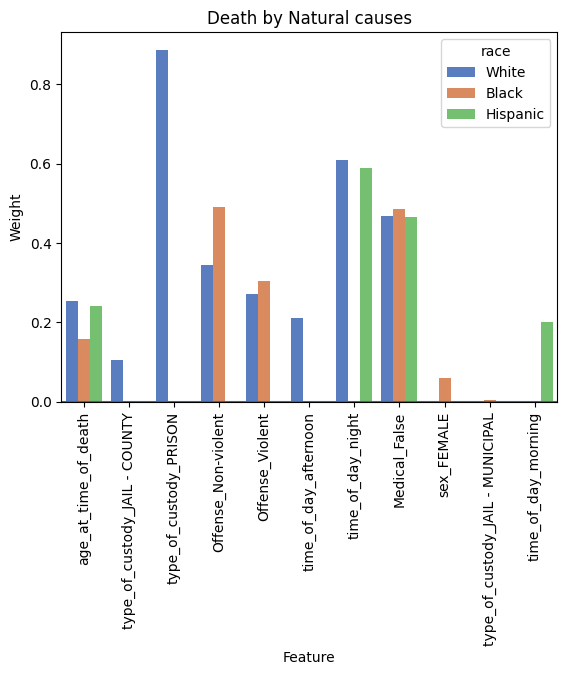

<ipython-input-43-55b792eb2993>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Feature', y='Weight', hue='race',


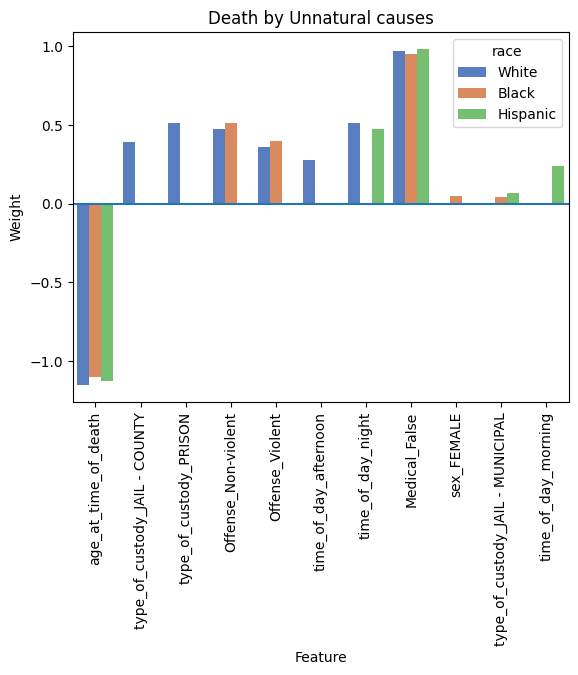

In [87]:
visualize_weights(thetas_df_white, thetas_df_black, thetas_df_hispanic)

<ipython-input-96-2811ca10959a>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Feature', y='Center', hue='race',


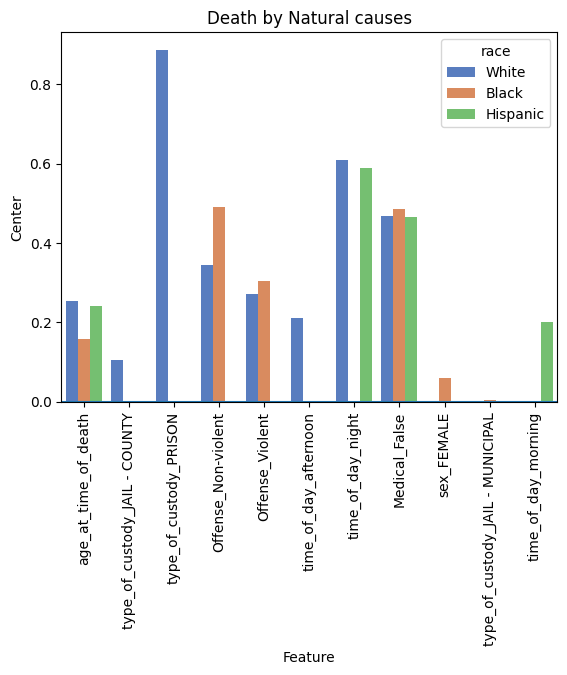

<ipython-input-96-2811ca10959a>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Feature', y='Center', hue='race',


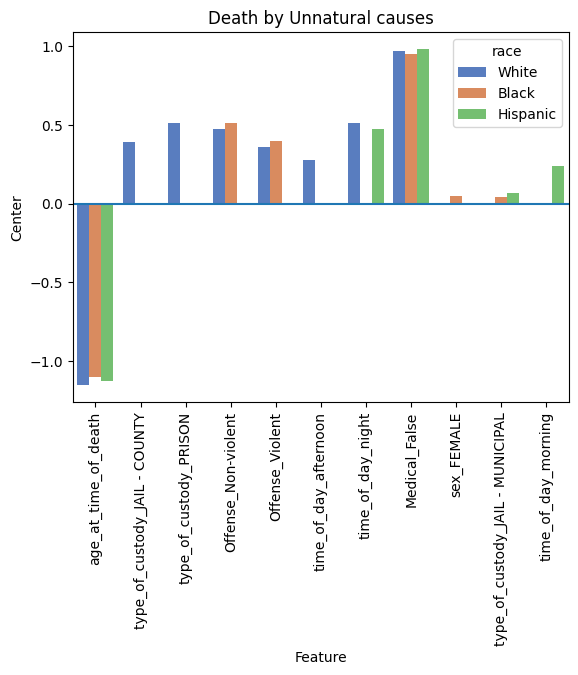

In [97]:
visualize_centers(thetas_df_white, thetas_df_black, thetas_df_hispanic)

In [96]:
def visualize_centers(df_white, df_black, df_hisp):

  #Melt each dataframe into a long format
  df_white_melt = df_white.melt(id_vars = 'Cause', var_name = 'Feature', value_name='Center')
  df_black_melt = df_black.melt(id_vars = 'Cause', var_name = 'Feature', value_name='Center')
  df_hisp_melt = df_hisp.melt(id_vars = 'Cause', var_name = 'Feature', value_name='Center')

  #Add race to long dfs
  df_white_melt['race'] = 'White'
  df_black_melt['race'] = 'Black'
  df_hisp_melt['race'] = 'Hispanic'

  #Combine the long dfs
  df_vis = pd.concat([df_white_melt, df_black_melt, df_hisp_melt])

  causes = df_vis['Cause'].unique()

  for cause in causes:

    cause_df = df_vis[df_vis['Cause']==cause]

    sns.barplot(x='Feature', y='Center', hue='race',
              data=cause_df, ci=None, palette='muted')

    plt.title(f'Death by {cause}')

    plt.axhline(y=0)

    plt.xticks(rotation=90)

    plt.show()

# White random forest (dry-run)

In [ ]:
df_white_Y = df_white['Natural']

df_white_X = df_white[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_white_X, df_white_Y, test_size=0.2)

numerical_columns = ['age_at_time_of_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_white = RandomForestClassifier(random_state=63)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_white)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = {
    'model__n_estimators': [10, 50, 100],
     'model__max_depth': [None, 10],
     'model__min_samples_split': [2, 4],
     'model__min_samples_leaf': [1, 2]
}


gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.86720867 0.82655827 0.82655827 0.84552846 0.8401084  0.85636856
 0.83468835 0.86413043 0.85597826 0.85597826] 
-------------------------------
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 10} 
-------------------------------
Test accuracy:  0.8741865509761388


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[716  46]
 [ 70  90]]
              precision    recall  f1-score   support

     Natural       0.91      0.94      0.93       762
   Unnatural       0.66      0.56      0.61       160

    accuracy                           0.87       922
   macro avg       0.79      0.75      0.77       922
weighted avg       0.87      0.87      0.87       922



In [ ]:
random_forest = best_model.named_steps['model']

importances = random_forest.feature_importances_

# Create a pandas DataFrame for better visualization
col_names = ('Age', 'Female', 'Male', 'Non-violent', 'Sexual', 'Violent')

importance_df = pd.DataFrame({
    'Feature': col_names,
    'Importance': importances
})

print(importance_df)

       Feature  Importance
0          Age    0.937949
1       Female    0.006980
2         Male    0.005711
3  Non-violent    0.005708
4       Sexual    0.032401
5      Violent    0.011251


# Black random forest (dry-run)

In [ ]:
df_black_Y = df_black['Natural']

df_black_X = df_black[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_black_X, df_black_Y, test_size=0.2)

numerical_columns = ['age_at_time_of_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_black = RandomForestClassifier(random_state=63)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_black)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = {
    'model__n_estimators': [10, 50, 100],
     'model__max_depth': [None, 10],
     'model__min_samples_split': [2, 4],
     'model__min_samples_leaf': [1, 2]
}


gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.864      0.88       0.828      0.884      0.892      0.892
 0.88353414 0.85542169 0.8875502  0.84738956] 
-------------------------------
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 10} 
-------------------------------
Test accuracy:  0.8541666666666666


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[505  15]
 [ 76  28]]
              precision    recall  f1-score   support

     Natural       0.87      0.97      0.92       520
   Unnatural       0.65      0.27      0.38       104

    accuracy                           0.85       624
   macro avg       0.76      0.62      0.65       624
weighted avg       0.83      0.85      0.83       624



In [ ]:
random_forest = best_model.named_steps['model']

importances = random_forest.feature_importances_

# Create a pandas DataFrame for better visualization
col_names = ('Age', 'Female', 'Male', 'Non-violent', 'Sexual', 'Violent')

importance_df = pd.DataFrame({
    'Feature': col_names,
    'Importance': importances
})

print(importance_df)

       Feature  Importance
0          Age    0.941247
1       Female    0.009969
2         Male    0.007264
3  Non-violent    0.007309
4       Sexual    0.014342
5      Violent    0.019870


# Hispanic random forest (dry-run)

In [ ]:
df_hispanic_Y = df_hispanic['Natural']

df_hispanic_X = df_hispanic[['sex',
                       'age_at_time_of_death',
                       'Offense',]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_hispanic_X, df_hispanic_Y, test_size=0.2)

numerical_columns = ['age_at_time_of_death']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

preprocess_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model_hispanic = RandomForestClassifier(random_state=63)

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', model_hispanic)
])


cv_results = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = 'accuracy')

print("CV-results:\n", cv_results, "\n-------------------------------")

cv = StratifiedKFold(n_splits=10)

param_grid = {
    'model__n_estimators': [10, 50, 100],
     'model__max_depth': [None, 10],
     'model__min_samples_split': [2, 4],
     'model__min_samples_leaf': [1, 2]
}


gridsearch = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

gridsearch.fit(X_train, y_train)

print("Best hyperparameters:", gridsearch.best_params_, "\n-------------------------------")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Test accuracy: ', accuracy)

CV-results:
 [0.84415584 0.87445887 0.86580087 0.87878788 0.87878788 0.86147186
 0.83116883 0.85281385 0.85714286 0.84848485] 
-------------------------------
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 10} 
-------------------------------
Test accuracy:  0.8477508650519031


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Confusion matrix:
 [[434  42]
 [ 46  56]]
              precision    recall  f1-score   support

     Natural       0.90      0.91      0.91       476
   Unnatural       0.57      0.55      0.56       102

    accuracy                           0.85       578
   macro avg       0.74      0.73      0.73       578
weighted avg       0.85      0.85      0.85       578



In [ ]:
random_forest = best_model.named_steps['model']

importances = random_forest.feature_importances_

# Create a pandas DataFrame for better visualization
col_names = ('Age', 'Female', 'Male', 'Non-violent', 'Sexual', 'Violent')

importance_df = pd.DataFrame({
    'Feature': col_names,
    'Importance': importances
})

print(importance_df)

       Feature  Importance
0          Age    0.937533
1       Female    0.004996
2         Male    0.008810
3  Non-violent    0.010806
4       Sexual    0.027763
5      Violent    0.010093
